# CLPsych Classification NLP Project: Neural Network
Noel Ellison

## 1. Set-up Data and Packages

### 1.1 Load Packages
In this section, I read in packages for the LLMs I intend on applying to this project. These packages were used in previous homework assignments. I am trying to run all the models from one program, but know that I had to set-up special enviornments for different models and so this may not be possible. If that does end up happening, I will have to write separate scripts to apply other models.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import all XML data which contains the text of the posts
from os import listdir, path
import xml.etree.ElementTree as ET
import re
import os
from lxml import etree

mypath = 'clpsych17-data/clpsych17-data/data/training/posts'
files = [path.join(mypath, f) for f in listdir(mypath) if f.endswith('.xml')]
messageIDs = []
messageBodys = []
messagePostTimes = []
authorIDs = []
kudos = []
views = []

#for file in files:
 #   print(file)
  #  tree = ET.parse(file)
   # root = tree.getroot()
    #for x in root[0]:
     #   print(x.tag, x.attrib)

for file in files:
    res = re.findall("post-(\d+).xml", file)
    if not res: continue
    messageIDs.append(res[0]) # You can append the result to a list
    tree = ET.parse(file)
    root = tree.getroot()
    for x in root[0]:
    #print(x.tag, x.attrib)
        if x.tag == 'body':
            messageBodys.append(x.text)
        if x.tag == 'post_time':
            messagePostTimes.append(x.text)
        if x.tag == 'author':
            authorIDs.append((x.attrib['href']).replace('/users/id/',''))
        if x.tag == 'kudos':
            kudos.append(x.findall(".//count")[0].text)
        if x.tag == 'views':
            views.append(x.findall(".//count")[0].text)
    if len(messageBodys) != len(messageIDs):
        messageBodys.append('')
    if len(messagePostTimes) != len(messageIDs):
        messagePostTimes.append('')
    if len(authorIDs) != len(messageIDs):
        authorIDs.append('')
    if len(kudos) != len(messageIDs):
        authorIDs.append('')
    if len(views) != len(messageIDs):
        authorIDs.append('')
    #print(res[0])

#tree.find('./message type').attrib['key']

In [4]:
print(len(messageIDs))
print(len(authorIDs))
print(len(messageBodys))
print(len(views))
print(len(kudos))
print(len(messagePostTimes))

65755
65755
65755
65755
65755
65755


In [167]:
import pandas as pd
dict = {'Message ID': messageIDs,'Author ID': authorIDs, 'Message Body': messageBodys, 'Message Views': views, 'Message Kudos': kudos, 'Message Post Time': messagePostTimes} 
    
df = pd.DataFrame(dict)

In [168]:
df.tail()

,Message ID,Author ID,Message Body,Message Views,Message Kudos,Message Post Time
65750,99987,3030,"<P>Hey <a href=""http://forums.au.reachout.com/t5/user/viewprofilepage/user-id/5849"">@panzerTank</a>,</P>\n<P>I think the others have given good advice, I just wanted to say I think you're really brave for opening up about your feelings, and deciding to do something about it. No-one should have to be lonely or be put down by people who should care for them. It really is never too late to make a positive change. Best of luck and let us know how you're getting on!</P>\n<P>&nbsp;</P>\n<P>blithe</P>",451,0,2014-08-22T10:28:17+00:00
65751,99989,292,"<P><a href=""http://forums.au.reachout.com/t5/user/viewprofilepage/user-id/2306"">@N1ghtW1ng</a>&nbsp;<img class=""emoticon emoticon-smileysurprised"" id=""smileysurprised"" src=""http://inspire.i.lithium.com/i/smilies/16x16_smiley-surprised.png"" alt=""Smiley Surprised"" title=""Smiley Surprised"" /> How could you not?!</P>\n<P>&nbsp;</P>\n<P>O is for Octopus</P>\n<P>&nbsp;</P>\n<P><IMG src=""http://s.hswstatic.com/gif/octopus-1.jpg"" border=""0"" /></P>",745,0,2014-08-22T10:29:15+00:00
65752,99993,3030,"<P>Hey <a href=""http://forums.au.reachout.com/t5/user/viewprofilepage/user-id/4053"">@Pillow</a>,</P>\n<P>I am glad to hear from you! I am so sorry to hear about your dog passing away. You don't need to feel bad about whether you cry or not. We all grieve in our own way, and sometimes, like you said, it can take a while for a loss like that to really sink in. I am glad that your counsellor is buying you a frame for a photo of him - that is a lovely gesture.</P>\n<P>I agree with the others - if you haven't already clarified with your counsellor what you can tell her in confidence, and what (if anything) she can disclose to other people - you should do it. That way you don't need to worry and you can just focus on talking to her. It sounds like she really cares about you, I hope you can give her another chance to help you. You deserve all the support you need.</P>\n<P>I hope you can get some help for your eating, too.</P>\n<P>Take lots of care, Pillow. We are thinking of you!</P>\n<P>&nbsp;</P>\n<P>blithe</P>",489,1,2014-08-22T10:35:29+00:00
65753,99995,292,"<P>Mwahahaha&nbsp;<img class=""emoticon emoticon-cathappy"" id=""cathappy"" src=""http://inspire.i.lithium.com/i/smilies/16x16_cat-happy.png"" alt=""Cat Happy"" title=""Cat Happy"" /></P>\n<P>&nbsp;</P>\n<P><IMG src=""http://img3.wikia.nocookie.net/__cb20130721131127/mlp/images/4/42/Pinkie_Pie_with_a_mustache_rubbing_her_hooves_together_S3E09.gif"" border=""0"" /></P>",426,0,2014-08-22T10:39:06+00:00
65754,99999,5111,"I am looking forward to a new job oppurtunity, I am also at home relaxing after a coffee with my older brother and my housemate",885,1,2014-08-22T10:44:38+00:00


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65755 entries, 0 to 65754
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Message ID         65755 non-null  object
 1   Author ID          65755 non-null  object
 2   Message Body       64371 non-null  object
 3   Message Views      65755 non-null  object
 4   Message Kudos      65755 non-null  object
 5   Message Post Time  65755 non-null  object
dtypes: object(6)
memory usage: 3.0+ MB


In [170]:
df['Message Body'][0]

'<BLOCKQUOTE><HR />FindingHope wrote:<BR />\n<P>Cassie: So my uncle was in a psych ward for about a couple of months and then when discharged, found out he was fired from his job today. It sucks that companies can have lack of compassion for people who are ill <img class="emoticon emoticon-smileysad" id="smileysad" src="http://inspire.i.lithium.com/i/smilies/16x16_smiley-sad.png" alt="Smiley Sad" title="Smiley Sad" /></P>\n<HR /></BLOCKQUOTE>\n<P>@Cassie: That seriously sucks. <img class="emoticon emoticon-smileysad" id="smileysad" src="http://inspire.i.lithium.com/i/smilies/16x16_smiley-sad.png" alt="Smiley Sad" title="Smiley Sad" /> It can be so sad when people don\'t try to take the time to understand the situation and when stigma comes into it. I hope he can find a new job without too much hassle.&nbsp;</P>'

#### 1.2.2 Read-in TSV Files (labels and author rank)

In [171]:
#Bring in classification of message
df_label = pd.read_csv('clpsych17-data/clpsych17-data/data/training/labels.tsv', sep='\t', names=['Message ID2','Label','Detail Label'])

In [172]:
df_label

,Message ID2,Label,Detail Label
0,135267,green,allClear
1,135268,green,allClear
2,135276,green,allClear
3,135277,green,allClear
4,135278,green,allClear
...,...,...,...
1183,139559,amber,followupOk
1184,139560,green,allClear
1185,139562,red,currentAcuteDistress
1186,139565,green,allClear


In [173]:
#Bring in author rankings
df_author = pd.read_csv('clpsych17-data/clpsych17-data/data/training/author_rankings.tsv', sep='\t', names=['Author ID2','Author Rank'])

In [174]:
df_author

,Author ID2,Author Rank
0,10,Community Manager
1,36,Staff
2,40,Staff
3,50,Rookie scribe
4,52,Community Manager
...,...,...
1644,6917,Visitor
1645,6930,Casual scribe
1646,6932,Rookie scribe
1647,6934,Rookie


In [175]:
df_author.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Author ID2   1649 non-null   int64 
 1   Author Rank  1649 non-null   object
dtypes: int64(1), object(1)
memory usage: 25.9+ KB


In [176]:
#Convert message ID and author to integer in order to merge with tab delimited files
df['Message ID2']=df['Message ID'].astype(int)
df['Author ID2']=df['Author ID'].astype(int)

In [177]:
#Merge message text with classification
df_new1=df.merge(df_label, how='inner', on='Message ID2')

In [178]:
#Merge message data (with label) with author ID
df_new=df_new1.merge(df_author, how='left', on='Author ID2')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Message ID         1188 non-null   object
 1   Author ID          1188 non-null   object
 2   Message Body       1188 non-null   object
 3   Message Views      1188 non-null   object
 4   Message Kudos      1188 non-null   object
 5   Message Post Time  1188 non-null   object
 6   Message ID2        1188 non-null   int32 
 7   Author ID2         1188 non-null   int32 
 8   Label              1188 non-null   object
 9   Detail Label       1188 non-null   object
 10  Author Rank        1188 non-null   object
dtypes: int32(2), object(9)
memory usage: 92.9+ KB


In [179]:
#Check one record on the merge
df_new[df_new['Message ID2']==135284]

,Message ID,Author ID,Message Body,Message Views,Message Kudos,Message Post Time,Message ID2,Author ID2,Label,Detail Label,Author Rank
7,135284,5155,"Redhead: aaaaarrrrgggg getting really sick of this hypomania. When will this end. getting so agitated, bored. And its raining so I can't even get out for a walk to calm down. what to do. Its starting to make me feel unsafe...<img class=""emoticon emoticon-smileysad"" id=""smileysad"" src=""http://inspire.i.lithium.com/i/smilies/16x16_smiley-sad.png"" alt=""Smiley Sad"" title=""Smiley Sad"" /> sorry for being so negative again",201,0,2015-04-24T06:23:04+00:00,135284,5155,crisis,crisis,Uber contributor


## 2. Data Pre-processing
In this section I pre-process the data.

### 2.1 Posts for ReachOut.com Staff
In this section, I look into the annotated posts for ReacOut.com Staff to see if they should be included in the dataset. I conclude that they should be included since there were 2 moderators with "Amber" posts and since moderators can be trained volunteers, it could be that the moderators themselves need help. The content of these 2 posts was indeed concerning, so I think we should categorize all posts including the staff.

There were 97 posts from staff members that were annotated and only 2 were classified as "Amber." I think that the addition 95 "Green" posts will provide good positive examples of "Green" posts, so it is also good to leave these in the dataset.

In [180]:
#Look at distribution of author rankings, see if annotations were done for staff
df_new['Author Rank'].value_counts()

Author Rank
Uber contributor             680
Star contributor             234
Casual scribe                 74
Mod                           49
Mod Squad                     43
Rookie scribe                 35
Super frequent scribe         27
Frequent scribe               22
Visitor                        7
Rookie                         7
Special Guest Contributor      5
Post Mod                       2
Youth Ambassador               2
Frequent Visitor               1
Name: count, dtype: int64

In [181]:
#Look at records for those who work at ReachOut (Community Manager, Mod, Mod in Training, Mod Squad, Reachout.com Crew, Special Guest Contributor, Staff)
reachout_staff = ['Community Manager', 'Mod', 'Mod in Training', 'Mod Squad', 'Reachout.com Crew', 'Special Guest Contributor', 'Staff']
df_staff=df_new[df_new['Author Rank'].isin(reachout_staff)]
df_staff['Label'].value_counts()

Label
green    95
amber     2
Name: count, dtype: int64

In [182]:
pd.set_option('display.max_colwidth', None)
df_staff[df_staff['Label']=='amber']['Message Body']

601     Hey guys,<BR /><BR />Long time no see. <img class="emoticon emoticon-smileytongue" id="smileytongue" src="http://inspire.i.lithium.com/i/smilies/16x16_smiley-tongue.png" alt="Smiley Tongue" title="Smiley Tongue" /> Been busy with Assignments and have been binging on Netflix and thinking a lot about what both my psychologist and Dr said.<BR /><BR />They pretty much hate all these new fandangle terms for sexuality and pretty much don't believe in the term demi. They think I am romantically and sexually repressed. But I've had relationships and crushes since the incident they are referring to. So confused. Especially when it came from someone I trust. Not at all what I was expecting.<BR /><BR />Just got to remember that only I can define my sexuality.
1025                                                                                                                                                                                                                                     

In [183]:
df_staff[df_staff['Label']=='amber']['Author Rank']

601     Mod
1025    Mod
Name: Author Rank, dtype: object

In [184]:
#Use this code if we want to remove ReachOut.com staff
#test_df = df_new[~df_new['Author Rank'].isin(reachout_staff)]
#test_df['Author Rank'].value_counts()

### 2.2 Isolate Emojis
In this section, I pull out the emoji information from the message body so it can be included as a feature. I intend to remove the HTML tags from the message body, but this also removes the emoji information. I wanted to keep that information because I think it could speak to emotional distress or stability. I didn't just keep the description of the emoji but also the prefix text **"emoticon-"** so that the model would treat this as emoji information.

In [185]:
#Isolate emoji text
#Find the position of <img
df_new['pos_emoji'] = df_new['Message Body'].str.find('<img')

#Use position to slice using a lambda function, this is the portion of the emoji line I am interested in
#Originally had x['pos_emoji'] thru the end of the line to confirm that there was no additiona information needed
df_new['emoji_text_full'] = df_new.apply(lambda x: x['Message Body'][x['pos_emoji']+20:x['pos_emoji']+50], axis=1)

#Find the end of the emoji string
df_new['end_pos_emoji'] =  df_new['emoji_text_full'].str.find('"')

#Slice and cut-off remaining emoji text
df_new['emoji_text'] = df_new.apply(lambda x: x['emoji_text_full'][0:x['end_pos_emoji']], axis=1)

#Look at the distribution of emojis in training data
emoji_data=df_new[df_new['pos_emoji']>0]

In [186]:
#Remove emoji text if no emojis were used in the message
df_new['Emoji Text'] = df_new.apply(lambda x: x['emoji_text'] if x['pos_emoji']>=0 else '', axis=1)

In [187]:
df_new['Emoji Text'].value_counts()

Emoji Text
                               915
 emoticon-smileyhappy          138
 emoticon-smileysad             41
 emoticon-smileyvery-happy      34
 emoticon-smileytongue          31
 emoticon-smileywink             6
 emoticon-heart                  5
 emoticon-smileysurprised        4
 emoticon-cathappy               2
 emoticon-smileyfrustrated       2
 emoticon-smileyindifferent      2
 emoticon-manmad                 1
 emoticon-manfrustrated          1
 emoticon-manvery-happy          1
 emoticon-womanlol               1
 emoticon-smileymad              1
 emoticon-cattongue              1
 emoticon-catsad                 1
 emoticon-catvery-happy          1
Name: count, dtype: int64

### 2.3 Add Date and Time Features
In this section, I use the date/time that the post was made to derive features that I think may be important:

- **Hour**: The hour that the post was made. Studies show that suicides are more prevelant between midnight and 6 am.
- **Day of Week**: The day of the week that the post was made. Studies show that suicides are more likely to occurr on Sundays and Mondays.
- **Month**: The month that the post was made. I have not researched this, but imagine that suicides may be higher around the holidays

In [188]:
#Create date and time variables to be added as features
import datetime
import calendar

# datetime in string format for may 25 1999
input = '2021/05/25'
format = '%Y/%m/%d'
 
#Get message date and time as separate variables
df_new['pos_time'] = df_new['Message Post Time'].str.find('T')
df_new['pos_plus'] = df_new['Message Post Time'].str.find('+')

#Use position to slice and get date only
df_new['Date'] = df_new.apply(lambda x: x['Message Post Time'][0:x['pos_time']], axis=1)

df_new['Time'] = df_new.apply(lambda x: x['Message Post Time'][x['pos_time']+1:x['pos_plus']], axis=1)
df_new['Hour'] = df_new.apply(lambda x: x['Time'][0:2], axis=1)

# convert from string format to datetime format
df_new['Datetime'] = pd.to_datetime(df_new['Date'], format='%Y-%m-%d')
df_new['Month'] = df_new.apply(lambda x: x['Datetime'].strftime("%B"), axis=1)

#Monday=0, Sunday=6
df_new['Day of Week'] = df_new['Datetime'].dt.dayofweek

#Replace the numeric day of the week with the name of the day
daynames = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_new['Day of Week'].replace(daynames, inplace=True)

#Look at results to confirm accuracy
print(df_new[['Message Post Time', 'Datetime', 'Date', 'Time','Hour','Day of Week','Month']].head(3))

#Look at times
#df_new['what_time'] = df_new['Message Post Time'].str.find('T2')
#df_new[df_new['what_time']>0]

           Message Post Time   Datetime        Date      Time Hour  \
0  2015-04-24T03:49:50+00:00 2015-04-24  2015-04-24  03:49:50   03   
1  2015-04-24T04:01:22+00:00 2015-04-24  2015-04-24  04:01:22   04   
2  2015-04-24T04:43:34+00:00 2015-04-24  2015-04-24  04:43:34   04   

  Day of Week  Month  
0      Friday  April  
1      Friday  April  
2      Friday  April  


### 2.4 Remove HTML Tags from Text
In this section, I remove HTML tags from the text to make it more readable. I have also retained the raw text as I intend to compare the performance of my LLMs on text with and without HTML tags.

In [219]:
#Drop variables used for derivations and only keep variables of interest
df_red=df_new[['Message ID2', 'Author ID2', 'Label', 'Author Rank', 'Message Body', 'Emoji Text', 'Day of Week', 'Hour', 'Date', 'Datetime', 'Month', 'Time', 'Message Views', 'Message Kudos']]

In [220]:
df_red.head((2))

,Message ID2,Author ID2,Label,Author Rank,Message Body,Emoji Text,Day of Week,Hour,Date,Datetime,Month,Time,Message Views,Message Kudos
0,135267,5111,green,Uber contributor,<P>JAN<BR /> <BR />FEB<BR /> <BR />MAR<BR /> <BR />APR</P>\n<P>17th: - J95!&nbsp;<BR /> <BR />MAY<BR /> <BR />JUN<BR /> <BR />JUL<BR />19th: Sophie!!<BR /> <BR />AUG<BR /> <BR />SEP<BR /> <BR />OCT<BR /> <BR />NOV <BR /> <BR />DEC</P>,,Friday,03,2015-04-24,2015-04-24,April,03:49:50,519,0
1,135268,5111,green,Uber contributor,"<P><div class=""video-embed-center video-embed-youtube""><iframe src=""http://www.youtube.com/embed/K_EjSuYWzxA"" width=""320"" height=""265"" frameborder=""0"" allowfullscreen=""true""></iframe></div></P>\n<P>&nbsp;</P>\n<P>Big Scary - Luck Now.&nbsp;</P>",,Friday,04,2015-04-24,2015-04-24,April,04:01:22,207,0


In [221]:
#Add variable for text without HTML tags
#df_new2=df_new.replace(to_replace="<[^>]*>|\n|&nbsp;", value="", regex=True)
df_red['Message Body no HTML']=df_red['Message Body'].replace(to_replace="<[^>]*>|\n|&nbsp;", value="", regex=True)
df_red.head((2))

,Message ID2,Author ID2,Label,Author Rank,Message Body,Emoji Text,Day of Week,Hour,Date,Datetime,Month,Time,Message Views,Message Kudos,Message Body no HTML
0,135267,5111,green,Uber contributor,<P>JAN<BR /> <BR />FEB<BR /> <BR />MAR<BR /> <BR />APR</P>\n<P>17th: - J95!&nbsp;<BR /> <BR />MAY<BR /> <BR />JUN<BR /> <BR />JUL<BR />19th: Sophie!!<BR /> <BR />AUG<BR /> <BR />SEP<BR /> <BR />OCT<BR /> <BR />NOV <BR /> <BR />DEC</P>,,Friday,03,2015-04-24,2015-04-24,April,03:49:50,519,0,JAN FEB MAR APR17th: - J95! MAY JUN JUL19th: Sophie!! AUG SEP OCT NOV DEC
1,135268,5111,green,Uber contributor,"<P><div class=""video-embed-center video-embed-youtube""><iframe src=""http://www.youtube.com/embed/K_EjSuYWzxA"" width=""320"" height=""265"" frameborder=""0"" allowfullscreen=""true""></iframe></div></P>\n<P>&nbsp;</P>\n<P>Big Scary - Luck Now.&nbsp;</P>",,Friday,04,2015-04-24,2015-04-24,April,04:01:22,207,0,Big Scary - Luck Now.


In [222]:
#Look at two observations to compare how the text with and without HTML tags looks
pd.set_option('display.max_colwidth', None)
df_red[df_red['Message ID2']==135284]['Message Body']

7    Redhead: aaaaarrrrgggg getting really sick of this hypomania. When will this end. getting so agitated, bored. And its raining so I can't even get out for a walk to calm down. what to do. Its starting to make me feel unsafe...<img class="emoticon emoticon-smileysad" id="smileysad" src="http://inspire.i.lithium.com/i/smilies/16x16_smiley-sad.png" alt="Smiley Sad" title="Smiley Sad" /> sorry for being so negative again
Name: Message Body, dtype: object

In [223]:
df_red[df_red['Message ID2']==135284]['Message Body no HTML']

7    Redhead: aaaaarrrrgggg getting really sick of this hypomania. When will this end. getting so agitated, bored. And its raining so I can't even get out for a walk to calm down. what to do. Its starting to make me feel unsafe... sorry for being so negative again
Name: Message Body no HTML, dtype: object

In [224]:
df_red[df_red['Message ID2']==135284]['Emoji Text']

7     emoticon-smileysad
Name: Emoji Text, dtype: object

### 2.5 Map Labels to Numeric Values
Some of the LLMs I intend to use need categories in numbers instead of text, so I create a new variable (Label Num) to contain this information.

In [225]:
#Map the label to a numerical value because this is needed for BERT instead of the text
#to_rep = {'green': 0, 'amber': 1, 'red': 2, 'crisis': 3}
to_num = {'green': 0, 'amber': 1, 'red': 2, 'crisis': 3}
df_red['Label Num']=df_red['Label']
df_red.replace({'Label Num': to_num}, inplace=True)

### 2.6 Create Text + Features Variable
The research I did indicated that prepending the additional features as text to the message body could improve the accuracy of my LLM. I added the following information to the beginning of the message text:

- **Author Rank**: "My author rank is XXXXX."
- **Day**: "It is XXXXX."
- **Month**: "The month is XXXXX."
- **Emoji Text**: "emoticon-XXXXXXXX."
- **Views**: "This post has XXXX views."
- **Kudos**: "This post has XXXX kudos."

In [226]:
#Combine text and features
df_red['Text and Features'] = "My author rank is " + df_red['Author Rank'] + "." \
                            + " I posted this on " + df_red['Day of Week'] +"." \
                            + " The time is " + df_red['Hour'] + " oclock." \
                            + " The month is " + df_red['Month'] + ". " \
                            + df_red['Emoji Text'] \
                            + " This post has " + df_red['Message Views'] + " views." \
                            + " This post has " + df_red['Message Kudos'] + " kudos." \
                            + df_red['Message Body no HTML']
print(df_red[['Author Rank', 'Day of Week', 'Hour', 'Month','Message Views','Message Kudos','Message Body no HTML', 'Text and Features']].head(1))

        Author Rank Day of Week Hour  Month Message Views Message Kudos  \
0  Uber contributor      Friday   03  April           519             0   

                                                         Message Body no HTML  \
0  JAN FEB MAR APR17th: - J95! MAY JUN JUL19th: Sophie!! AUG SEP OCT NOV  DEC   

                                                                                                                                                                                                                    Text and Features  
0  My author rank is Uber contributor. I posted this on Friday. The time is 03 oclock. The month is April.  This post has 519 views. This post has 0 kudos.JAN FEB MAR APR17th: - J95! MAY JUN JUL19th: Sophie!! AUG SEP OCT NOV  DEC  


In [227]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Message ID2           1188 non-null   int32         
 1   Author ID2            1188 non-null   int32         
 2   Label                 1188 non-null   object        
 3   Author Rank           1188 non-null   object        
 4   Message Body          1188 non-null   object        
 5   Emoji Text            1188 non-null   object        
 6   Day of Week           1188 non-null   object        
 7   Hour                  1188 non-null   object        
 8   Date                  1188 non-null   object        
 9   Datetime              1188 non-null   datetime64[ns]
 10  Month                 1188 non-null   object        
 11  Time                  1188 non-null   object        
 12  Message Views         1188 non-null   object        
 13  Message Kudos     

### 2.7 Data Investigation

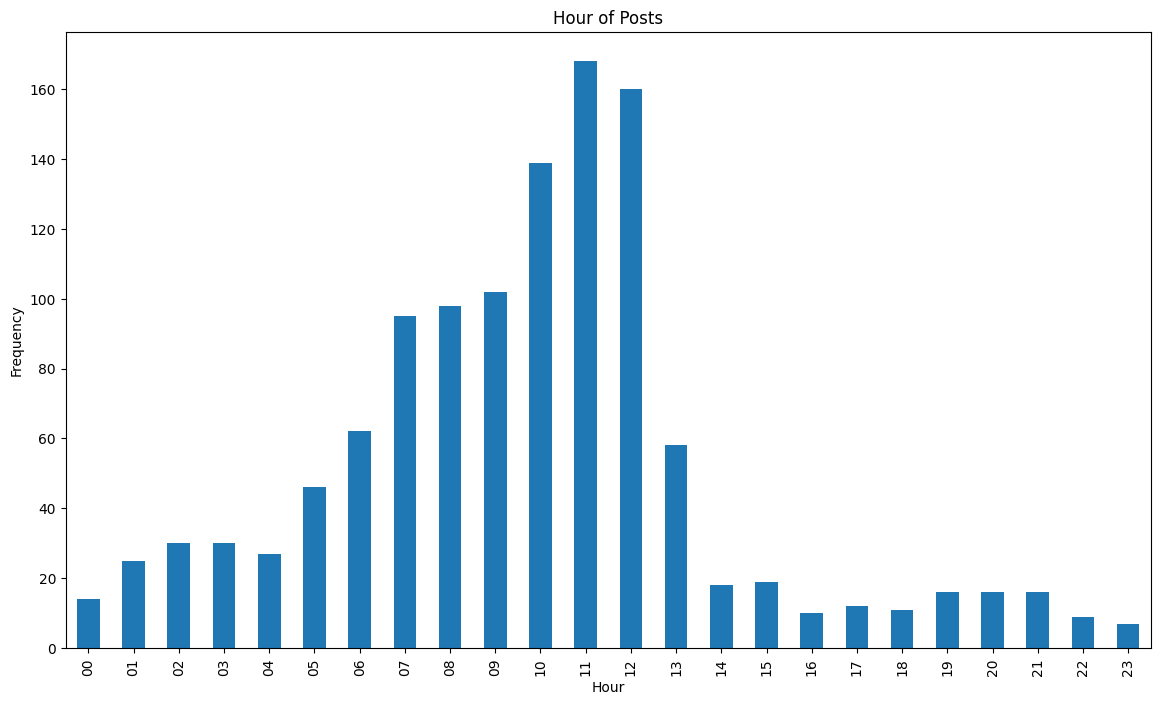

In [142]:
ax = df_red.groupby(['Hour'])['Hour'].count().plot.bar(title="Hour of Posts", figsize=(14,8))
_ = ax.set_xlabel('Hour')
_ = ax.set_ylabel('Frequency')

<Axes: xlabel='Day of Week'>

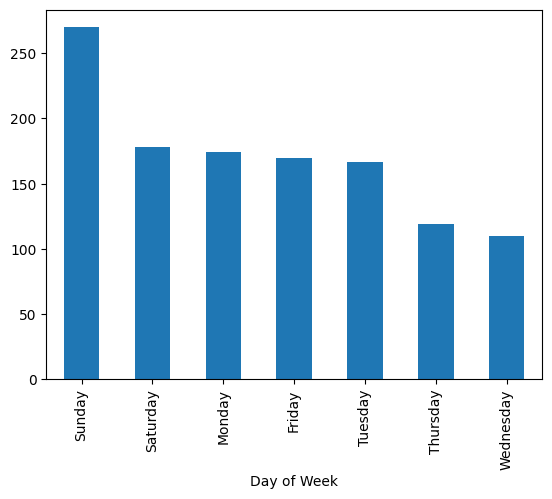

In [143]:
df_red['Day of Week'].value_counts().plot(kind='bar')

<Axes: xlabel='Month'>

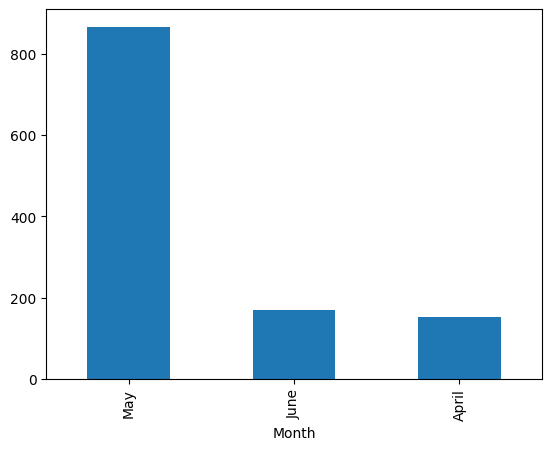

In [144]:
df_red['Month'].value_counts().plot(kind='bar')

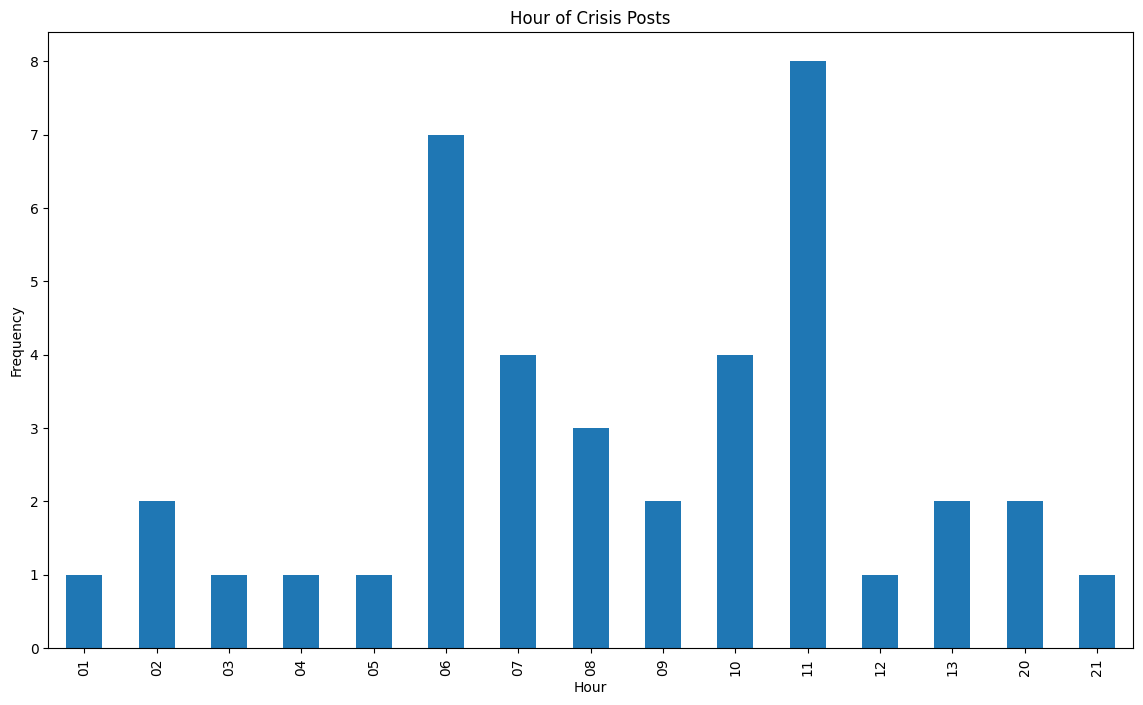

In [145]:
df_c=df_red[df_red['Label']=='crisis']
ax = df_c.groupby(['Hour'])['Hour'].count().plot.bar(title="Hour of Crisis Posts", figsize=(14,8))
_ = ax.set_xlabel('Hour')
_ = ax.set_ylabel('Frequency')

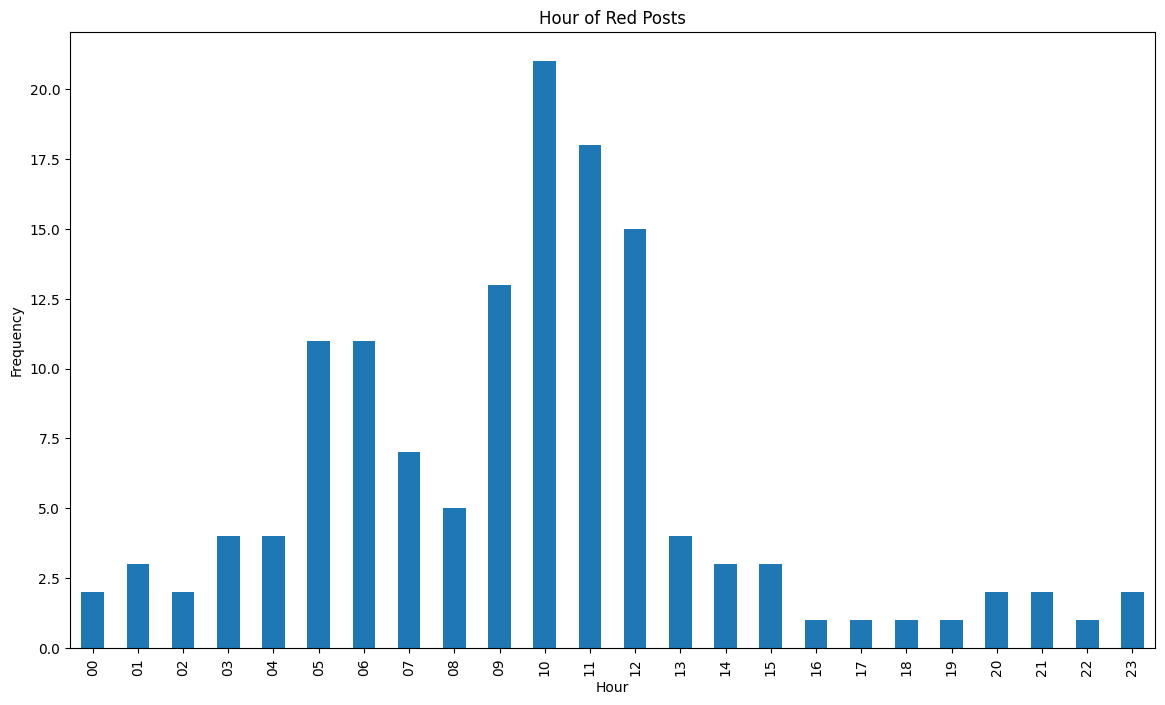

In [146]:
df_c=df_red[df_red['Label']=='red']
ax = df_c.groupby(['Hour'])['Hour'].count().plot.bar(title="Hour of Red Posts", figsize=(14,8))
_ = ax.set_xlabel('Hour')
_ = ax.set_ylabel('Frequency')

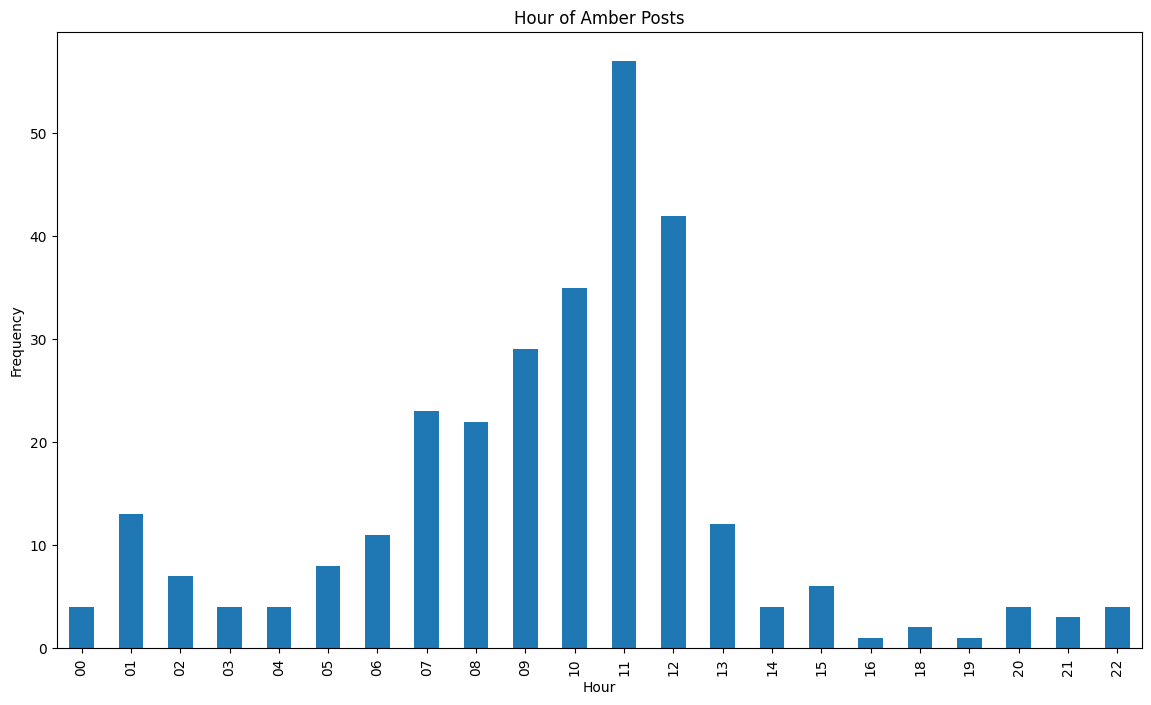

In [147]:
df_c=df_red[df_new['Label']=='amber']
ax = df_c.groupby(['Hour'])['Hour'].count().plot.bar(title="Hour of Amber Posts", figsize=(14,8))
_ = ax.set_xlabel('Hour')
_ = ax.set_ylabel('Frequency')

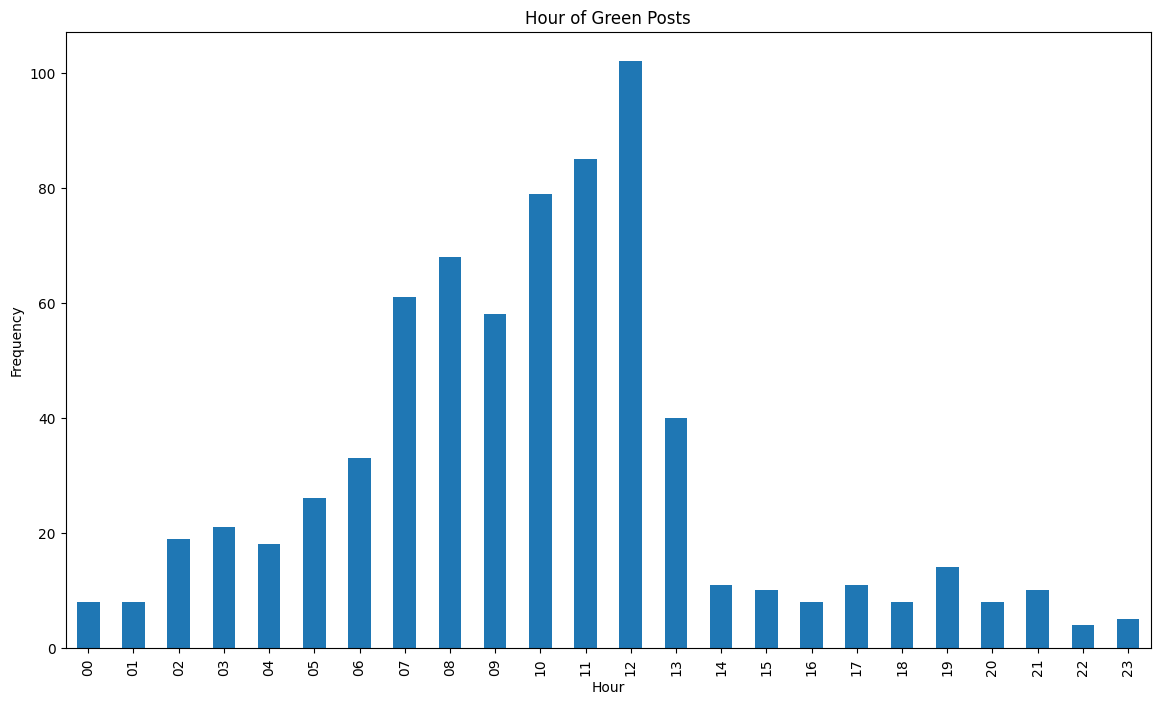

In [148]:
df_c=df_red[df_new['Label']=='green']
ax = df_c.groupby(['Hour'])['Hour'].count().plot.bar(title="Hour of Green Posts", figsize=(14,8))
_ = ax.set_xlabel('Hour')
_ = ax.set_ylabel('Frequency')

## 3. Logistic Regression

### 3.1 Logistic Regression with Additional Features Only

In [47]:
#Create dataset to add dummy variables to
df_LR=df_red

In [48]:
#Create dummy variables for categorical variables
author_rank=pd.get_dummies(df_LR['Author Rank'], drop_first=True)
day=pd.get_dummies(df_LR['Day of Week'], drop_first=True)
month=pd.get_dummies(df_LR['Month'], drop_first=True)

In [49]:
df_LR.drop(['Author Rank','Day of Week','Month','Message ID2','Author ID2','Message Body','Emoji Text','Text and Features','Label Num','Date','Datetime','Time', 'Message Body no HTML'], axis=1, inplace=True)
df_LR=pd.concat([df_LR, author_rank, day, month], axis=1)

,Label,Hour,Message Views,Message Kudos,Frequent Visitor,Frequent scribe,Mod,Mod Squad,Post Mod,Rookie,...,Visitor,Youth Ambassador,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,June,May
0,green,03,519,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,green,04,207,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,green,04,515,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,green,04,218,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,green,04,511,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [94]:
#Fill in missing categories and numeric values
# Identify the columns in your df that are of type Object (i.e. categorical)
categ_vars = [col for col in df_LR.columns if df_LR[col].dtypes == 'O'] 

# Loop over them, and fill them with 'empty'
for col in df_LR[categ_vars]:
    df_LR[col].fillna('empty',inplace=True) 

In [95]:
import numpy as np
np.random.seed(42)
test = df_LR.sample(frac=0.1,random_state=200)
train = df_LR.drop(test.index)

test.shape, train.shape 

((119, 25), (1069, 25))

In [96]:
#Get labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_LR['Label']) 
y = le.transform(train['Label'])

In [97]:
#Format X dataset
train.drop(['Label'], axis=1, inplace=True)

#Convert to numeric
train=train.apply(pd.to_numeric)
X=train.to_numpy()

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
clfr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100000)

In [100]:
clfr.fit(X,y)

LogisticRegression(max_iter=100000, multi_class='multinomial')

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [102]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_LR['Label']) 
test_y = le.transform(test['Label'])

In [103]:
#Format X dataset
test.drop(['Label'], axis=1, inplace=True)

#Convert to numeric
test=test.apply(pd.to_numeric)
test_X=test.to_numpy()

In [104]:
print("Accuracy: ", accuracy_score(clfr.predict(test_X), test_y))
print("F1: ", f1_score(test_y, clfr.predict(test_X), average='weighted'))

Accuracy:  0.5882352941176471
F1:  0.4752161734258921


### 3.2 Logistic Regression with Text + Features

In [269]:
import spacy

In [270]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 3.2 MB/s eta 0:00:04
     - -------------------------------------- 0.4/12.8 MB 5.1 MB/s eta 0:00:03
     -- ------------------------------------- 0.7/12.8 MB 5.8 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/12.8 MB 6.4 MB/s eta 0:00:02
     ---- ----------------------------------- 1.5/12.8 MB 6.7 MB/s eta 0:00:02
     ----- ---------------------------------- 1.9/12.8 MB 7.1 MB/s eta 0:00:02
     ------- -------------------------------- 2.4/12.8 MB 7.6 MB/s eta 0:00:02
     --------- ------------------------------ 2.9/12.8 MB 8.0 MB/s eta 0:00:02
     ---------- ----------------------------- 3.3/12.8 MB 8.1 MB/s eta 0:00:02
     ------------ --------------------------- 4.0/12.8 MB 8.5 MB/s eta 0:00:02
     -------------- ------------------------- 4.6/12.8 MB 8.9 MB/

In [271]:
#This is one of the possible embedding pacakges in spacy
nlp = spacy.load("en_core_web_sm")

In [272]:
import numpy as np
from collections import defaultdict
import tqdm # tqdm displays a progress bar
from tqdm import tqdm_notebook as tqdm # tqdm is a nice process indicator 

In [273]:
category_vectors = []
Labels = set(df_red['Label'])
cats = list(Labels)

In [274]:
category_vectors = []

# for each category
for cat in cats:
    # grab all of the documents from that category
    id_list=df_red[df_red['Label']==cat]['Message ID2'].tolist()
    
    for message_id in id_list: #get the list of corpuses of this category
        sents = df_red[df_red['Message ID2']==message_id]['Text and Features'].tolist() #Get sentences from the specified record
        sent_vecs = []

        for sent in sents:
            sent = ''.join(sent)

            sent = nlp(sent) #Perform embedding on each word using the embedding selected from spacy
            # grab all of the words, find their embedding, sum all embeddings            
            word_sum = np.sum([tok.vector for tok in sent], axis=0) # why axis=0?
            
            # add the now summed embedding to the list for this category
            sent_vecs.append(word_sum)
            
        category_vectors.append((cat,np.sum(sent_vecs, axis=0)))

In [275]:
import pandas as pd

keys,values=zip(*category_vectors) # unzip using a *

data = pd.DataFrame({'cat':keys,'vectors':values})

In [237]:
pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [238]:
data[:3]

,cat,vectors
0,green,"[-23.283745, -22.120865, -19.351767, -6.20777, 2.6121843, 8.962331, 21.845167, 26.825003, 10.508505, -2.2514637, 32.946735, 15.308259, -31.33801, 3.2330678, -26.832773, 9.547434, -23.029688, -10.86375, 9.194988, -3.130032, -9.729349, -4.1977253, 13.591044, -4.319433, -3.750471, 4.201682, 21.48061, 28.033703, 13.391999, 12.188585, 13.2838745, 11.117179, 22.90238, -7.8274136, -4.676192, 44.302956, 5.1543007, 4.74111, -4.599772, 20.892708, 1.0701284, 7.5205784, -6.914652, 7.506356, -19.484652, 2.7158606, -4.25456, 29.620451, 27.063717, -1.2460417, -5.3807096, -26.628597, 17.846003, -9.930425, 4.7314105, -21.118277, -3.5443802, -31.542852, 16.84608, 10.235302, -11.034858, -20.224337, 5.928774, 9.848965, 11.587418, -4.8103666, -11.800676, -11.649876, -16.240078, 1.9931126, 10.719248, 2.4775567, -4.077312, -17.776758, 37.413116, -1.539794, -4.540353, -24.806076, -8.780929, -22.486969, -9.87158, -26.477657, -34.926136, -25.967888, 14.703707, 6.665669, 18.214317, 14.138802, -35.948025, 37.950623, -9.353821, -5.5568914, 58.28017, 4.610719, -11.858204, 12.390783]"
1,green,"[-15.68332, -14.245095, -9.628439, -1.44256, 0.29776937, 1.0745394, 15.318999, 18.23412, 7.757531, -7.4064946, 31.943136, 5.67538, -17.136786, 15.838393, -18.037376, 0.10914898, -15.967794, -3.2848136, 0.9512249, 0.98842555, -4.648184, 0.04747358, 9.61333, -5.9734263, -2.9857168, 6.6548343, 15.118318, 13.439146, 8.914945, 10.965884, 10.501833, 10.155166, 18.86066, -12.562139, -6.329731, 31.13691, -2.8903902, 2.6296766, -1.0900024, 18.856031, 4.2903194, 12.647083, -2.898326, 8.754722, -10.716431, 10.8260565, -13.357866, 24.877094, 24.087282, -8.336508, -7.9544415, -14.301038, 8.100962, -11.050768, 3.856314, -17.40068, -3.8535752, -19.05441, 4.6934967, 6.693171, 0.15670839, -14.731075, -2.8003476, 17.372307, 14.012835, 0.4997803, -4.5026045, -6.169299, -14.426754, 2.9475307, 6.778918, 4.7391696, -6.6706038, -13.867075, 16.11534, -8.779422, -9.111724, -22.46021, -8.108555, -22.46143, -12.622342, -19.596222, -21.938261, -18.225988, 14.265634, 0.5714005, 13.997563, 9.428752, -22.572258, 22.941465, -6.3186626, -5.3200607, 36.07495, 3.9883802, -12.425756, 9.025524]"
2,green,"[-16.70835, -14.903997, -11.963209, -3.9115844, 2.1799574, 7.975936, 17.810738, 12.903812, 7.511257, -11.84414, 33.99034, 9.834502, -24.372818, 7.446593, -18.68861, 6.6583376, -18.350187, -11.280938, 3.3898275, -0.19347611, -8.512948, -3.8697367, 6.167012, -1.2353014, -9.831617, 1.0710939, 19.68371, 23.61708, 14.096959, 9.361023, 10.52066, 8.807584, 23.649662, -18.776823, -7.3062067, 42.21493, 1.2397455, 6.4204845, 0.30344665, 22.636919, 3.4492369, 9.970368, -2.9324336, 3.3866556, -10.818631, 1.2562919, -4.6528788, 24.826012, 17.20576, -3.7061813, -9.424376, -22.947933, 9.185872, -7.947584, 8.097779, -10.161368, -8.938943, -19.938549, 9.425054, 12.304096, -0.0034672022, -20.771103, -0.46650362, 9.560686, 17.001299, 0.62032616, -12.87548, -11.184629, -15.908523, 1.9538083, 11.165627, 7.4258604, -12.315492, -7.080362, 17.995268, -5.192879, 2.856755, -25.033833, -0.72679555, -26.783867, -12.292597, -25.231628, -22.842993, -15.660334, 11.61445, 6.50076, 13.155928, 9.998178, -23.857437, 22.355938, -4.2508144, -2.1680949, 39.171547, 6.7070746, -15.239827, 17.36108]"


In [239]:
total = len(data)
total

1188

In [240]:
print('random baseline {}'.format(1.0/len(cat)))

print('most common baseline?')
for cat in cats:
    print(cat, len(data[data.cat==cat])/total)

random baseline 0.2
most common baseline?
green 0.6018518518518519
red 0.11531986531986532
crisis 0.03367003367003367
amber 0.24915824915824916


In [241]:
np.random.seed(42)
test = data.sample(frac=0.1,random_state=200)
train = data.drop(test.index)

test.shape, train.shape 

((119, 2), (1069, 2))

In [242]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.cat) 
X = [x for x in train.vectors]
y = le.transform(train.cat)

In [243]:
from sklearn.linear_model import LogisticRegression

In [244]:
clfr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100000)

In [245]:
clfr.fit(X,y)

LogisticRegression(max_iter=100000, multi_class='multinomial')

In [246]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [247]:
test_y = le.transform(test.cat)
test_X = [x for x in test.vectors]

print("Accuracy: ", accuracy_score(clfr.predict(test_X), test_y))
print("F1: ", f1_score(test_y, clfr.predict(test_X), average='weighted'))

Accuracy:  0.6554621848739496
F1:  0.6431022554138361


### 3.3 Logistic Regression with Text Only (no HTML code removed)

In [53]:
category_vectors = []

# for each category
for cat in cats:
    # grab all of the documents from that category
    id_list=df_red[df_red['Label']==cat]['Message ID2'].tolist()
    
    for message_id in id_list: #get the list of corpuses of this category
        sents = df_red[df_red['Message ID2']==message_id]['Message Body'].tolist() #Get sentences from the specified record

        ###WHY DOESN'T THIS WORK????###
        #sents = df_red[df_red['Message ID2']==message_id]['Message Body no HTML'].tolist() 
        
        sent_vecs = []

        for sent in sents:
            sent = ''.join(sent)

            sent = nlp(sent) #Perform embedding on each word using the embedding selected from spacy
            # grab all of the words, find their embedding, sum all embeddings            
            word_sum = np.sum([tok.vector for tok in sent], axis=0) # why axis=0?
            
            # add the now summed embedding to the list for this category
            sent_vecs.append(word_sum)
            
        category_vectors.append((cat,np.sum(sent_vecs, axis=0),message_id))

In [54]:
import pandas as pd

keys,values,id=zip(*category_vectors) # unzip using a *

data = pd.DataFrame({'cat':keys,'vectors':values, 'Message ID2':id})

In [55]:
np.random.seed(42)
test = data.sample(frac=0.1,random_state=200)
train = data.drop(test.index)

test.shape, train.shape 

((119, 3), (1069, 3))

In [56]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.cat) 
X = [x for x in train.vectors]
y = le.transform(train.cat)

In [57]:
clfr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100000)

In [58]:
clfr.fit(X,y)

LogisticRegression(max_iter=100000, multi_class='multinomial')

In [59]:
test_y = le.transform(test.cat)
test_X = [x for x in test.vectors]

print("Accuracy: ", accuracy_score(clfr.predict(test_X), test_y))
print("F1: ", f1_score(test_y, clfr.predict(test_X), average='weighted'))

Accuracy:  0.6470588235294118
F1:  0.639903312676422


### 3.4 Logistic Regression with Text with HTML Codes Removed

In [60]:
category_vectors = []

# for each category
for cat in cats:
    # grab all of the documents from that category
    id_list=df_red[df_red['Label']==cat]['Message ID2'].tolist()
    
    for message_id in id_list: #get the list of corpuses of this category
        sents = df_red[df_red['Message ID2']==message_id]['Message Body no HTML'].tolist() #Get sentences from the specified record

        ###WHY DOESN'T THIS WORK????###
        #sents = df_red[df_red['Message ID2']==message_id]['Message Body no HTML'].tolist() 
        
        sent_vecs = []

        for sent in sents:
            sent = ''.join(sent)

            sent = nlp(sent) #Perform embedding on each word using the embedding selected from spacy
            # grab all of the words, find their embedding, sum all embeddings            
            word_sum = np.sum([tok.vector for tok in sent], axis=0) # why axis=0?
            
            # add the now summed embedding to the list for this category
            sent_vecs.append(word_sum)
            
        category_vectors.append((cat,np.sum(sent_vecs, axis=0),message_id))

In [61]:
import pandas as pd

keys,values,id=zip(*category_vectors) # unzip using a *

data = pd.DataFrame({'cat':keys,'vectors':values, 'Message ID2':id})

In [63]:
data['size'] = data['vectors'].size

In [65]:
data['size'].value_counts()

size
1188    1188
Name: count, dtype: int64

In [110]:
#Remove vectors that have 0.0 (no text)
data=data[data['vectors'].str.len() > 5]

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1184 entries, 0 to 1187
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cat          1184 non-null   object
 1   vectors      1184 non-null   object
 2   Message ID2  1184 non-null   int64 
 3   size         1184 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [113]:
np.random.seed(42)
test = data.sample(frac=0.1,random_state=200)
train = data.drop(test.index)

test.shape, train.shape 

((118, 4), (1066, 4))

In [114]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.cat) 
X = [x for x in train.vectors]
y = le.transform(train.cat)

In [117]:
#Check length of each array to make sure it is not 0
#for x in X:
#    print(len(x))

In [118]:
clfr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100000)

In [119]:
clfr.fit(X,y)

LogisticRegression(max_iter=100000, multi_class='multinomial')

In [120]:
##WHY IS THIS ONE ALWAYS LOWER, IT IS THE SAME CODE besides hte merge
test_y = le.transform(test.cat)
test_X = [x for x in test.vectors]

print("Accuracy: ", accuracy_score(clfr.predict(test_X), test_y))
print("F1: ", f1_score(test_y, clfr.predict(test_X), average='weighted'))

Accuracy:  0.6610169491525424
F1:  0.6410631741140216


## 4 Neural Network

### 4.1 NN with Different Number of Nodes

#### 4.1.1 NN with 50 nodes

In [285]:
from sklearn import preprocessing

test = data.sample(frac=0.1,random_state=200)
train = data.drop(test.index)

le = preprocessing.LabelEncoder() # convert to numerical categories
ohe = preprocessing.OneHotEncoder() # convert categories to distributions (i.e., 1-hot vectors)
le.fit(data.cat)
y = le.transform(train.cat).reshape(-1, 1) # this is magic
ohe.fit(y)
y = ohe.transform(y).todense()

X = np.array([x for x in train.vectors])

X.shape, y.shape

((1069, 96), (1069, 4))

In [286]:
#Format testing data in the same way
test_y = le.transform(test.cat).reshape(-1, 1) # this is magic
test_y = ohe.transform(test_y).todense()
act_y = le.transform(test.cat)

X_test = np.array([x for x in test.vectors])

X_test.shape, test_y.shape

((119, 96), (119, 4))

In [287]:
#Import needed packages for neural networks
import keras
import time
from keras.models import Sequential
from keras.layers import Dense
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

import timeit
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

from keras import backend as K 
K.clear_session()

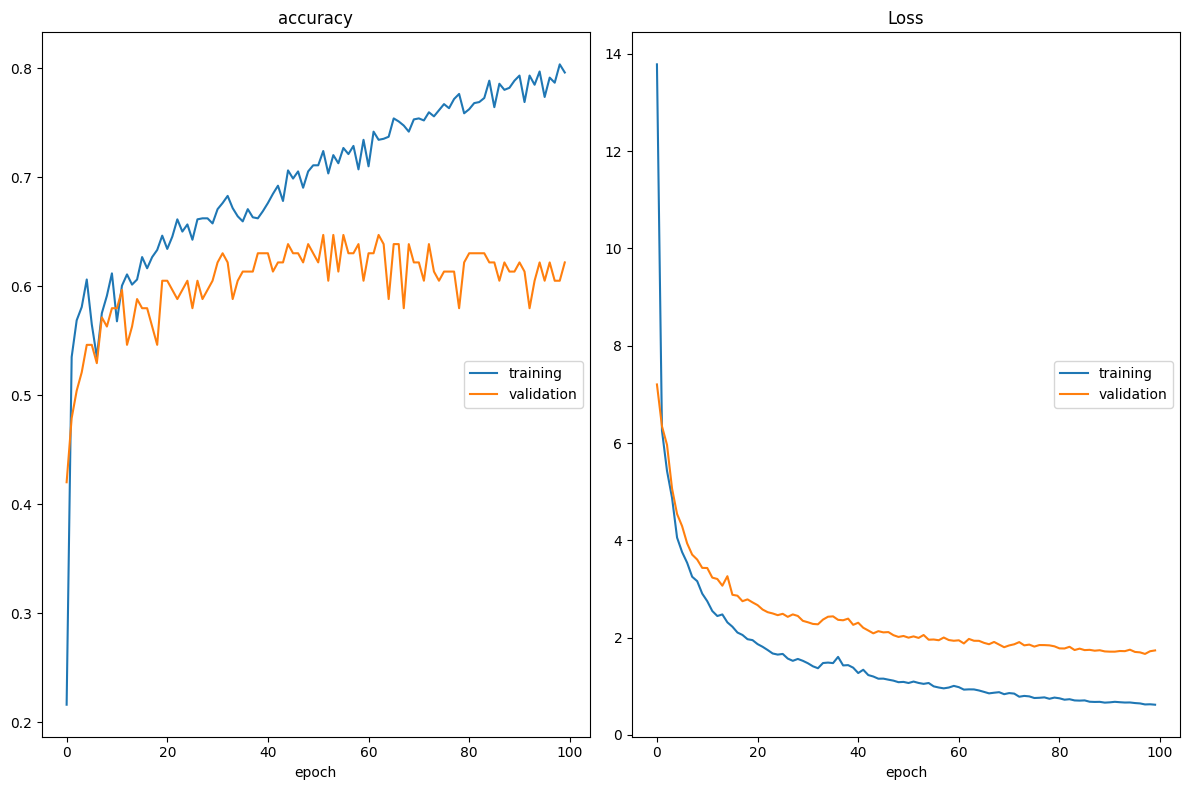

accuracy
	training         	 (min:    0.216, max:    0.804, cur:    0.796)
	validation       	 (min:    0.420, max:    0.647, cur:    0.622)
Loss
	training         	 (min:    0.618, max:   13.787, cur:    0.618)
	validation       	 (min:    1.663, max:    7.204, cur:    1.735)
5/5 [==============================] - 0s 112ms/step - loss: 0.6183 - accuracy: 0.7961 - val_loss: 1.7347 - val_accuracy: 0.6218
47.23051071166992


In [288]:
#As indicated in class, last dense layer should be # of classes with softmax (need to use categorical cross entropy/KL divergence)
#Softmax because there are multiple classes
start = time.time()
K.clear_session()

#Build model
model = Sequential()
model.add(Dense(50, input_dim=96, activation='relu'))
model.add(Dense(4, activation='softmax'))

#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train and evaluate model
plot_losses = livelossplot.PlotLossesKeras()
history = model.fit(X, y, epochs=100, batch_size=256, 
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, test_y))
#Elapsed time
end = time.time()
print(end - start)

from sklearn.metrics import classification_report

In [289]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

2/2 [==============================] - 0s 3ms/step


In [290]:
print("Accuracy: ", accuracy_score(y_pred_bool, act_y))
print("F1: ", f1_score(act_y,y_pred_bool, average='weighted'))

Accuracy:  0.6218487394957983
F1:  0.6114344958762726


#### 4.1.2 NN with 200 nodes

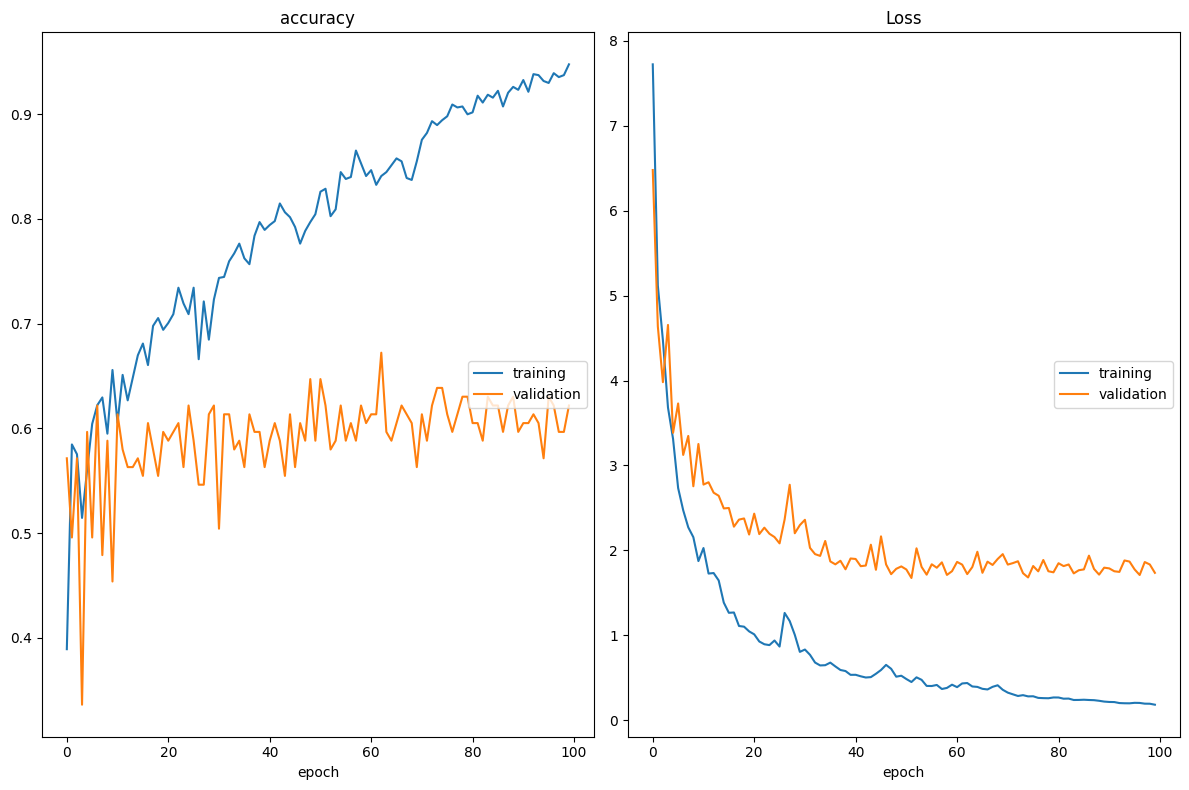

accuracy
	training         	 (min:    0.389, max:    0.948, cur:    0.948)
	validation       	 (min:    0.336, max:    0.672, cur:    0.622)
Loss
	training         	 (min:    0.182, max:    7.723, cur:    0.182)
	validation       	 (min:    1.675, max:    6.479, cur:    1.735)
5/5 [==============================] - 0s 113ms/step - loss: 0.1825 - accuracy: 0.9476 - val_loss: 1.7353 - val_accuracy: 0.6218
48.513808727264404
2/2 [==============================] - 0s 3ms/step
Accuracy:  0.6218487394957983
F1:  0.6123590124583311


In [291]:
#Increase to 200 nodes on hidden layer
start = time.time()

K.clear_session()
plot_losses = livelossplot.PlotLossesKeras()

#Build model
model = Sequential()
model.add(Dense(200, input_dim=96, activation='relu'))
model.add(Dense(4, activation='softmax'))

#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train and fit model
history = model.fit(X, y, epochs=100, batch_size=256, 
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, test_y))

#Elapsed time
end = time.time()
print(end - start)

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print("Accuracy: ", accuracy_score(y_pred_bool, act_y))
print("F1: ", f1_score(act_y,y_pred_bool, average='weighted'))

#### 4.1.3 NN with 100 nodes

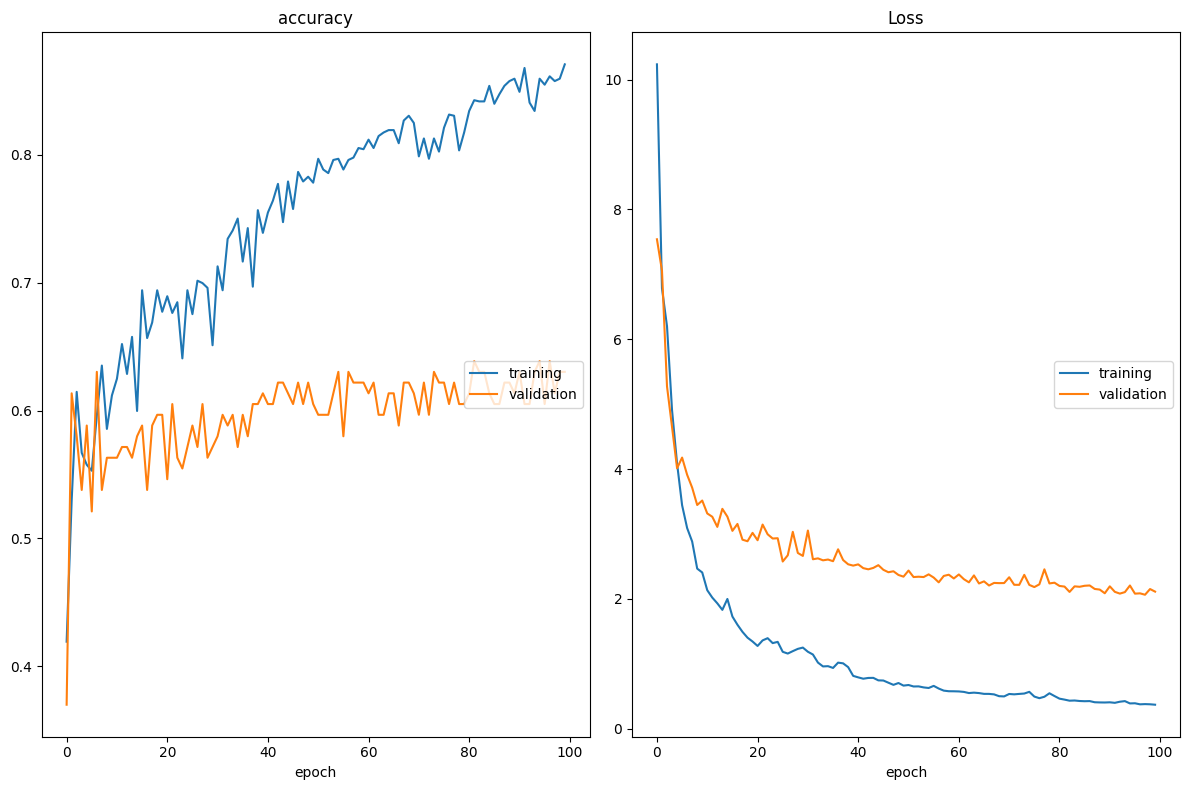

accuracy
	training         	 (min:    0.419, max:    0.871, cur:    0.871)
	validation       	 (min:    0.370, max:    0.639, cur:    0.630)
Loss
	training         	 (min:    0.370, max:   10.234, cur:    0.370)
	validation       	 (min:    2.064, max:    7.539, cur:    2.111)
5/5 [==============================] - 0s 123ms/step - loss: 0.3696 - accuracy: 0.8709 - val_loss: 2.1114 - val_accuracy: 0.6303
46.145453453063965
2/2 [==============================] - 0s 2ms/step
Accuracy:  0.6302521008403361
F1:  0.6260749914000688


In [292]:
#Increase to 100 nodes on hidden layer
start = time.time()

K.clear_session()
plot_losses = livelossplot.PlotLossesKeras()

#Build model
model = Sequential()
model.add(Dense(100, input_dim=96, activation='relu'))
model.add(Dense(4, activation='softmax'))

#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train and fit model
history = model.fit(X, y, epochs=100, batch_size=256, 
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, test_y))

#Elapsed time
end = time.time()
print(end - start)

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print("Accuracy: ", accuracy_score(y_pred_bool, act_y))
print("F1: ", f1_score(act_y,y_pred_bool, average='weighted'))

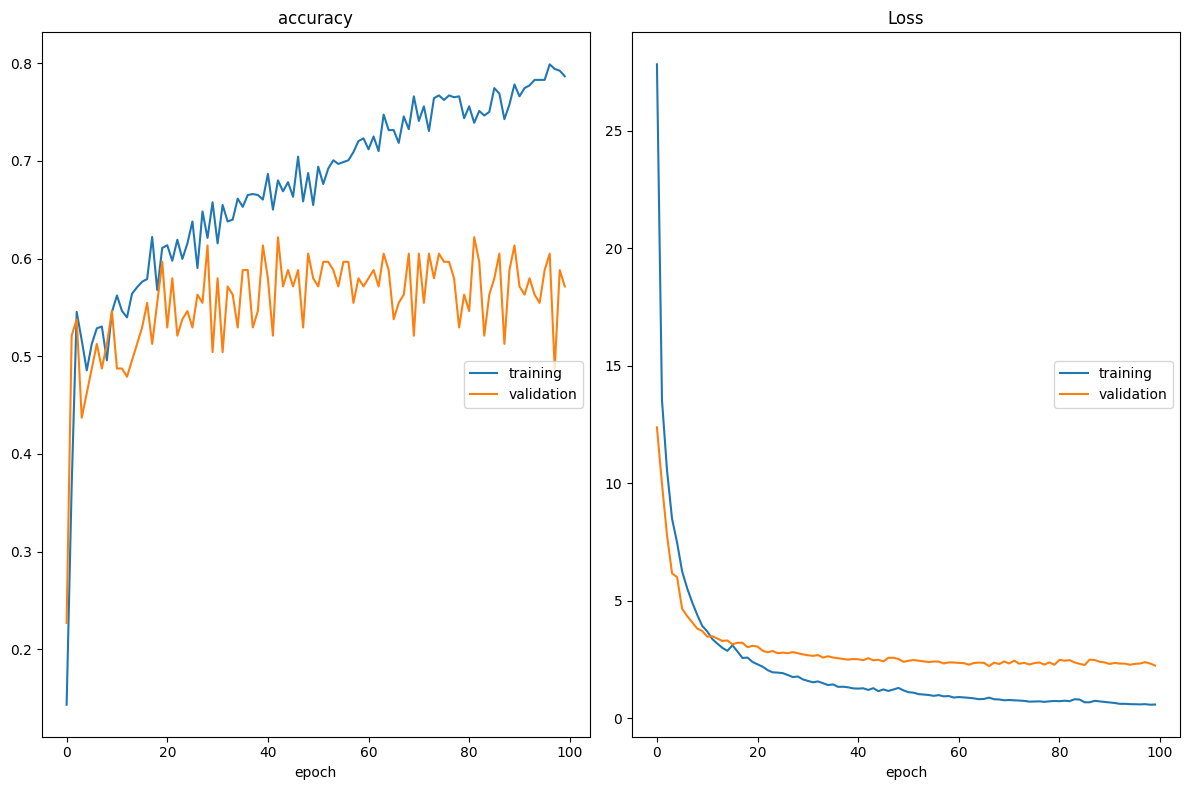

accuracy
	training         	 (min:    0.143, max:    0.799, cur:    0.787)
	validation       	 (min:    0.227, max:    0.622, cur:    0.571)
Loss
	training         	 (min:    0.586, max:   27.825, cur:    0.594)
	validation       	 (min:    2.228, max:   12.384, cur:    2.254)
5/5 [==============================] - 0s 111ms/step - loss: 0.5937 - accuracy: 0.7867 - val_loss: 2.2535 - val_accuracy: 0.5714
45.735621213912964
2/2 [==============================] - 0s 2ms/step
Accuracy:  0.5714285714285714
F1:  0.573880383617305


In [293]:
#Increase to 75 nodes on hidden layer
start = time.time()

K.clear_session()
plot_losses = livelossplot.PlotLossesKeras()

#Build model
model = Sequential()
model.add(Dense(75, input_dim=96, activation='relu'))
model.add(Dense(4, activation='softmax'))

#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train and fit model
history = model.fit(X, y, epochs=100, batch_size=256, 
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, test_y))

#Elapsed time
end = time.time()
print(end - start)

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print("Accuracy: ", accuracy_score(y_pred_bool, act_y))
print("F1: ", f1_score(act_y,y_pred_bool, average='weighted'))

### 4.2 NN with Different Activation Function

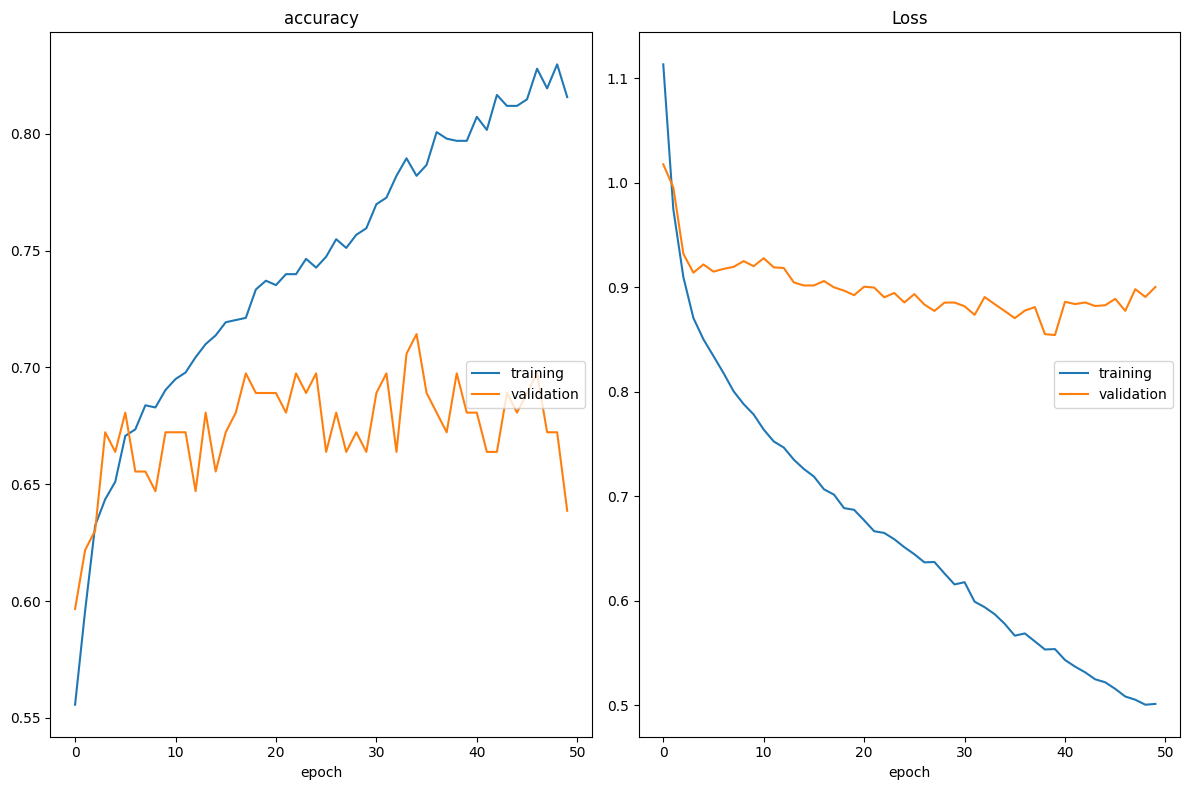

accuracy
	training         	 (min:    0.556, max:    0.830, cur:    0.816)
	validation       	 (min:    0.597, max:    0.714, cur:    0.639)
Loss
	training         	 (min:    0.501, max:    1.113, cur:    0.501)
	validation       	 (min:    0.854, max:    1.018, cur:    0.900)
5/5 [==============================] - 0s 109ms/step - loss: 0.5014 - accuracy: 0.8157 - val_loss: 0.9003 - val_accuracy: 0.6387
23.96621060371399
2/2 [==============================] - 0s 3ms/step
Accuracy:  0.6386554621848739
F1:  0.6117763474854979


In [294]:
#Softmax because there are multiple classes
start = time.time()
K.clear_session()

#Build model
model = Sequential()
model.add(Dense(100, input_dim=96, activation='tanh'))
model.add(Dense(4, activation='softmax'))

#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train and evaluate model
plot_losses = livelossplot.PlotLossesKeras()
history = model.fit(X, y, epochs=50, batch_size=256, 
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, test_y))
#Elapsed time
end = time.time()
print(end - start)

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print("Accuracy: ", accuracy_score(y_pred_bool, act_y))
print("F1: ", f1_score(act_y,y_pred_bool, average='weighted'))

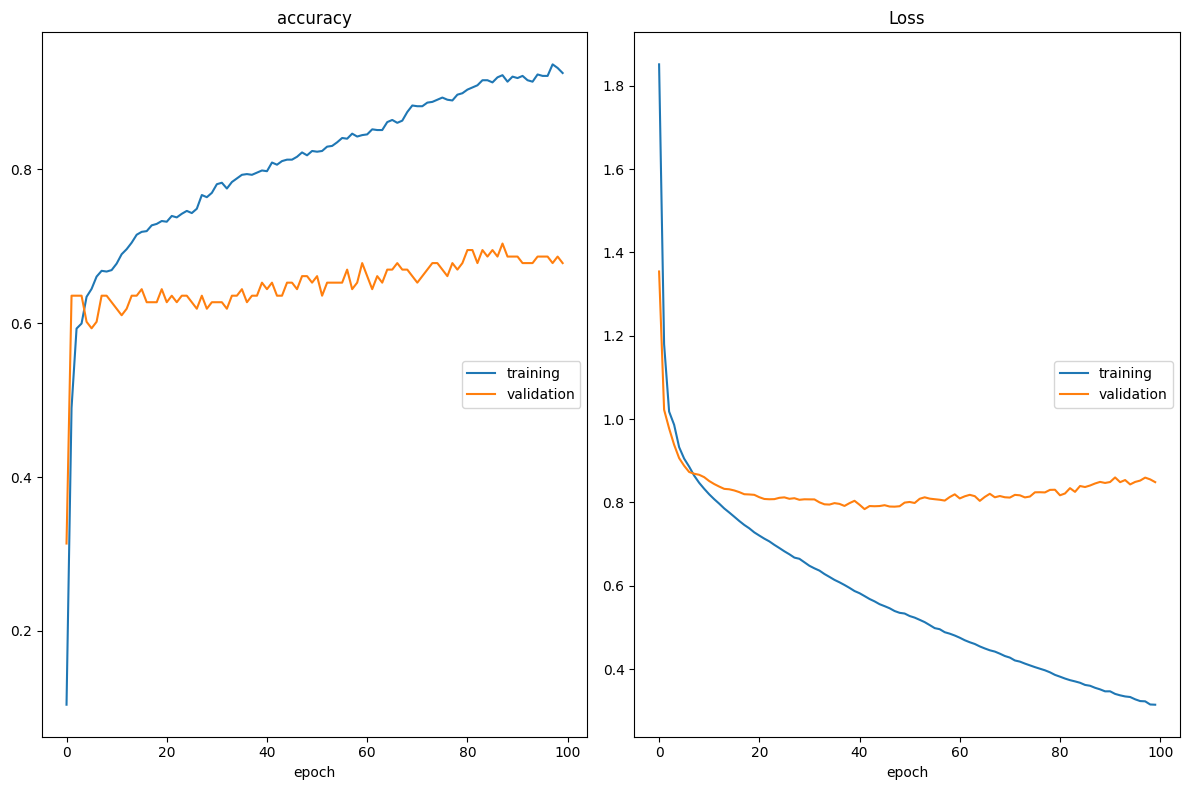

accuracy
	training         	 (min:    0.104, max:    0.936, cur:    0.925)
	validation       	 (min:    0.314, max:    0.703, cur:    0.678)
Loss
	training         	 (min:    0.314, max:    1.851, cur:    0.314)
	validation       	 (min:    0.784, max:    1.354, cur:    0.849)
5/5 [==============================] - 0s 123ms/step - loss: 0.3143 - accuracy: 0.9250 - val_loss: 0.8486 - val_accuracy: 0.6780
57.099470138549805
2/2 [==============================] - 0s 4ms/step
Accuracy:  0.6779661016949152
F1:  0.6396416121443169


In [323]:
#Softmax because there are multiple classes
start = time.time()
K.clear_session()

#Build model
model = Sequential()
model.add(Dense(100, input_dim=96, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))

#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train and evaluate model
plot_losses = livelossplot.PlotLossesKeras()
history = model.fit(X, y, epochs=100, batch_size=256, 
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, test_y))
#Elapsed time
end = time.time()
print(end - start)

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print("Accuracy: ", accuracy_score(y_pred_bool, act_y))
print("F1: ", f1_score(act_y,y_pred_bool, average='weighted'))

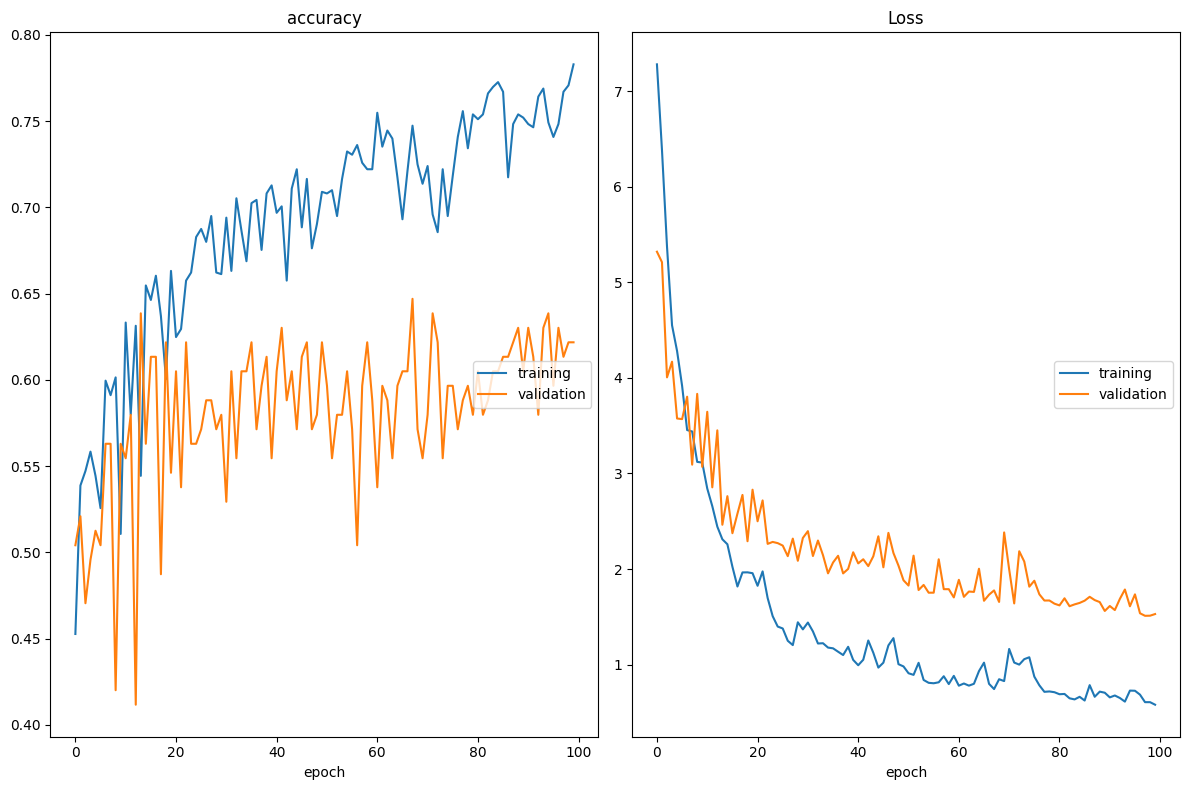

accuracy
	training         	 (min:    0.453, max:    0.783, cur:    0.783)
	validation       	 (min:    0.412, max:    0.647, cur:    0.622)
Loss
	training         	 (min:    0.580, max:    7.280, cur:    0.580)
	validation       	 (min:    1.510, max:    5.320, cur:    1.529)
5/5 [==============================] - 1s 259ms/step - loss: 0.5803 - accuracy: 0.7830 - val_loss: 1.5287 - val_accuracy: 0.6218
51.74219608306885
2/2 [==============================] - 0s 6ms/step
Accuracy:  0.6218487394957983
F1:  0.6170477150970666


In [297]:
#Leaky relu
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU

#Use sigmoid
start = time.time()

K.clear_session()
plot_losses = livelossplot.PlotLossesKeras()

#Build model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation=LeakyReLU()))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train and fit model
history = model.fit(X, y, epochs=100, batch_size=256, 
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, test_y))

#Elapsed time
end = time.time()
print(end - start)

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print("Accuracy: ", accuracy_score(y_pred_bool, act_y))
print("F1: ", f1_score(act_y,y_pred_bool, average='weighted'))

### 4.3 NN with Different Number of Hidden Layers

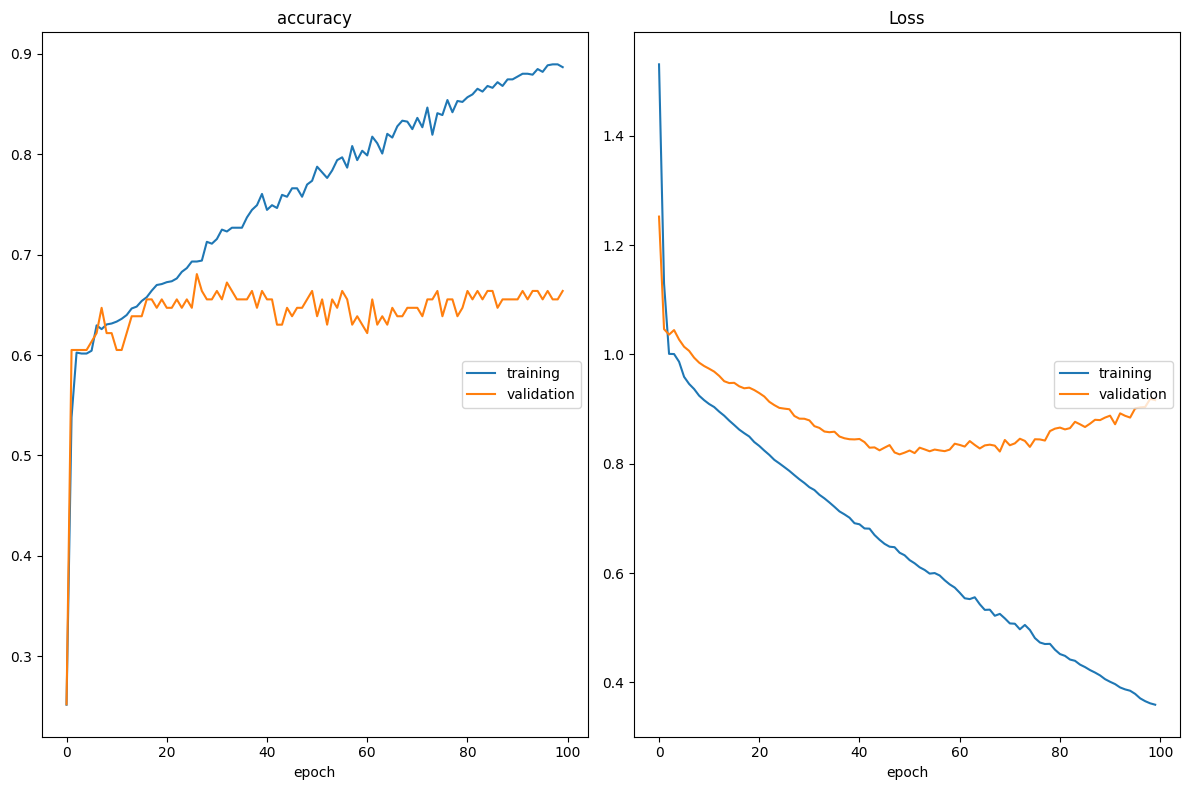

accuracy
	training         	 (min:    0.252, max:    0.890, cur:    0.887)
	validation       	 (min:    0.252, max:    0.681, cur:    0.664)
Loss
	training         	 (min:    0.359, max:    1.531, cur:    0.359)
	validation       	 (min:    0.817, max:    1.252, cur:    0.916)
5/5 [==============================] - 1s 244ms/step - loss: 0.3592 - accuracy: 0.8868 - val_loss: 0.9164 - val_accuracy: 0.6639
54.55563545227051
2/2 [==============================] - 0s 3ms/step
Accuracy:  0.6638655462184874
F1:  0.6523809523809523


In [331]:
#As indicated in class, last dense layer should be # of classes with softmax (need to use categorical cross entropy/KL divergence)
#Softmax because there are multiple classes
start = time.time()
K.clear_session()

#Build model
model = Sequential()
model.add(Dense(100, input_dim=96, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))

#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train and evaluate model
plot_losses = livelossplot.PlotLossesKeras()
history = model.fit(X, y, epochs=100, batch_size=256, 
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, test_y))
#Elapsed time
end = time.time()
print(end - start)

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print("Accuracy: ", accuracy_score(y_pred_bool, act_y))
print("F1: ", f1_score(act_y,y_pred_bool, average='weighted'))

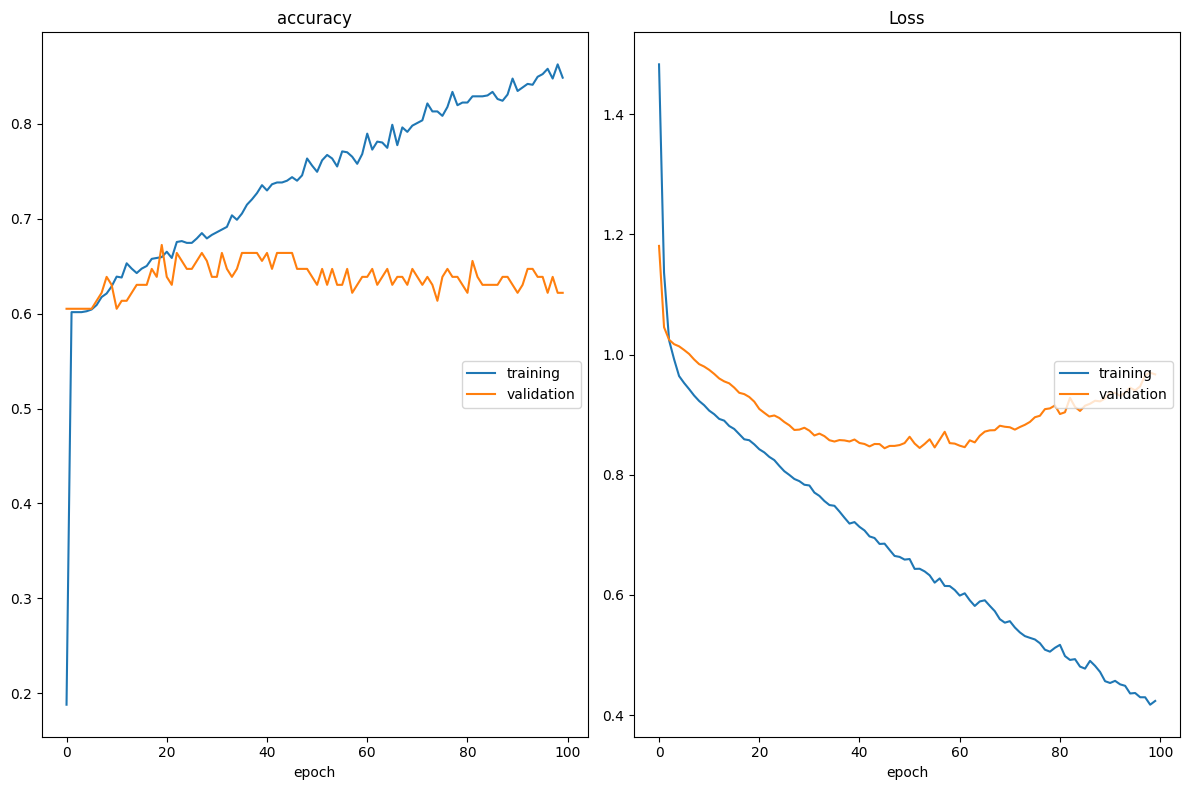

accuracy
	training         	 (min:    0.188, max:    0.862, cur:    0.848)
	validation       	 (min:    0.605, max:    0.672, cur:    0.622)
Loss
	training         	 (min:    0.417, max:    1.483, cur:    0.424)
	validation       	 (min:    0.844, max:    1.181, cur:    0.967)
5/5 [==============================] - 0s 117ms/step - loss: 0.4237 - accuracy: 0.8485 - val_loss: 0.9671 - val_accuracy: 0.6218
49.1114068031311
2/2 [==============================] - 0s 3ms/step
Accuracy:  0.6218487394957983
F1:  0.6032996795243957


In [302]:
start = time.time()

K.clear_session()
model = Sequential()
#model.add(Dense(250, input_shape=(1,), activation='sigmoid'))
model.add(Dense(100, input_dim=96, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))

#LR default is 0.01
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

plot_losses = livelossplot.PlotLossesKeras()
history = model.fit(X, y, epochs=100, batch_size=256, 
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, test_y))

#Elapsed time
end = time.time()
print(end - start)

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print("Accuracy: ", accuracy_score(y_pred_bool, act_y))
print("F1: ", f1_score(act_y,y_pred_bool, average='weighted'))

### 4.4 NN with Raw Text

In [303]:
category_vectors = []
Labels = set(df_red['Label'])
cats = list(Labels)

In [304]:
category_vectors = []

# for each category
for cat in cats:
    # grab all of the documents from that category
    id_list=df_red[df_red['Label']==cat]['Message ID2'].tolist()
    
    for message_id in id_list: #get the list of corpuses of this category
        sents = df_red[df_red['Message ID2']==message_id]['Message Body'].tolist() #Get sentences from the specified record

        ###WHY DOESN'T THIS WORK????###
        #sents = df_red[df_red['Message ID2']==message_id]['Message Body no HTML'].tolist() 
        
        sent_vecs = []

        for sent in sents:
            sent = ''.join(sent)

            sent = nlp(sent) #Perform embedding on each word using the embedding selected from spacy
            # grab all of the words, find their embedding, sum all embeddings            
            word_sum = np.sum([tok.vector for tok in sent], axis=0) # why axis=0?
            
            # add the now summed embedding to the list for this category
            sent_vecs.append(word_sum)
            
        category_vectors.append((cat,np.sum(sent_vecs, axis=0)))

In [305]:
import pandas as pd

keys,values=zip(*category_vectors) # unzip using a *

data = pd.DataFrame({'cat':keys,'vectors':values})

In [306]:
from sklearn import preprocessing

test = data.sample(frac=0.1,random_state=200)
train = data.drop(test.index)

le = preprocessing.LabelEncoder() # convert to numerical categories
ohe = preprocessing.OneHotEncoder() # convert categories to distributions (i.e., 1-hot vectors)
le.fit(data.cat)
y = le.transform(train.cat).reshape(-1, 1) # this is magic
ohe.fit(y)
y = ohe.transform(y).todense()

X = np.array([x for x in train.vectors])

X.shape, y.shape

((1069, 96), (1069, 4))

In [307]:
#Format testing data in the same way
test_y = le.transform(test.cat).reshape(-1, 1) # this is magic
test_y = ohe.transform(test_y).todense()
act_y = le.transform(test.cat)

X_test = np.array([x for x in test.vectors])

X_test.shape, test_y.shape

((119, 96), (119, 4))

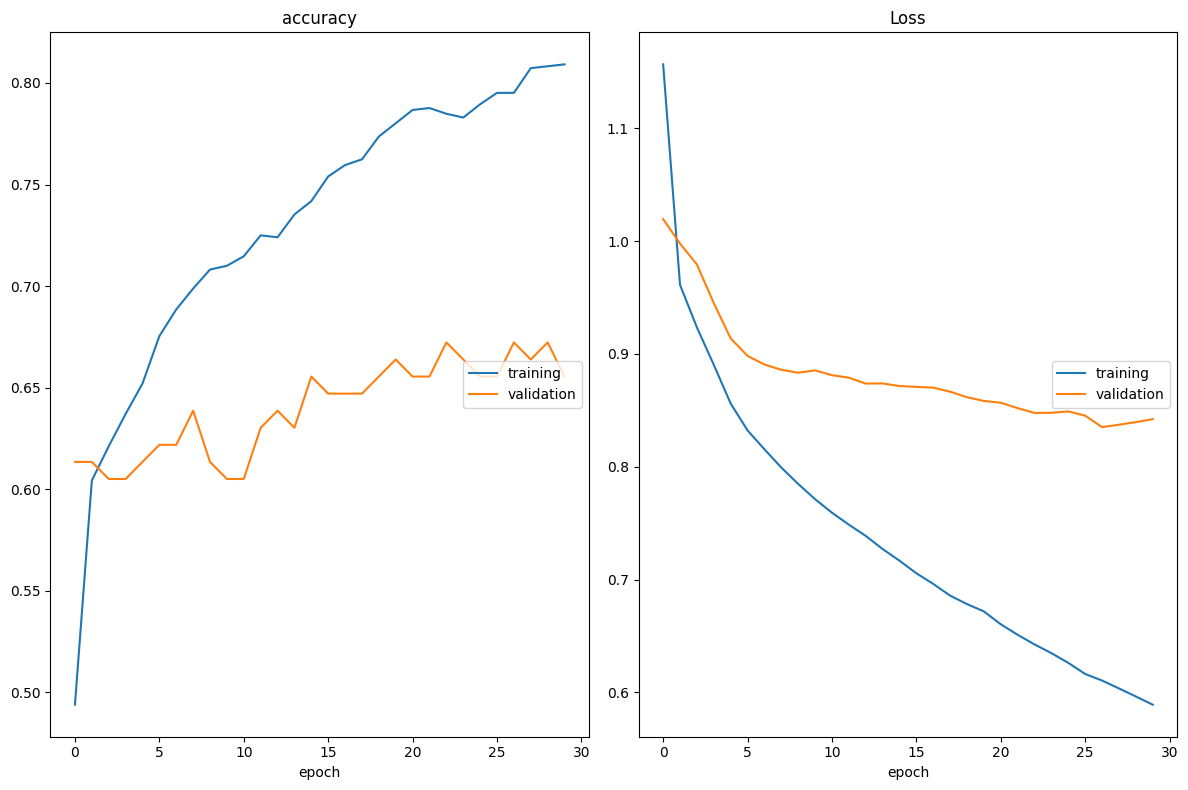

accuracy
	training         	 (min:    0.494, max:    0.809, cur:    0.809)
	validation       	 (min:    0.605, max:    0.672, cur:    0.655)
Loss
	training         	 (min:    0.589, max:    1.157, cur:    0.589)
	validation       	 (min:    0.835, max:    1.019, cur:    0.842)
5/5 [==============================] - 0s 112ms/step - loss: 0.5891 - accuracy: 0.8092 - val_loss: 0.8422 - val_accuracy: 0.6555
14.797270774841309
2/2 [==============================] - 0s 2ms/step
Accuracy:  0.6554621848739496
F1:  0.6297391683946307


In [314]:
#Softmax because there are multiple classes
start = time.time()
K.clear_session()

#Build model
model = Sequential()
model.add(Dense(100, input_dim=96, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))

#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train and evaluate model
plot_losses = livelossplot.PlotLossesKeras()
history = model.fit(X, y, epochs=30, batch_size=256, 
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, test_y))
#Elapsed time
end = time.time()
print(end - start)

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print("Accuracy: ", accuracy_score(y_pred_bool, act_y))
print("F1: ", f1_score(act_y,y_pred_bool, average='weighted'))

### 4.5 NN with Fixed Text

In [315]:
category_vectors = []
Labels = set(df_red['Label'])
cats = list(Labels)

In [316]:
category_vectors = []

# for each category
for cat in cats:
    # grab all of the documents from that category
    id_list=df_red[df_red['Label']==cat]['Message ID2'].tolist()
    
    for message_id in id_list: #get the list of corpuses of this category
        sents = df_red[df_red['Message ID2']==message_id]['Message Body no HTML'].tolist() #Get sentences from the specified record
        
        sent_vecs = []

        for sent in sents:
            sent = ''.join(sent)

            sent = nlp(sent) #Perform embedding on each word using the embedding selected from spacy
            # grab all of the words, find their embedding, sum all embeddings            
            word_sum = np.sum([tok.vector for tok in sent], axis=0) # why axis=0?
            
            # add the now summed embedding to the list for this category
            sent_vecs.append(word_sum)
            
        category_vectors.append((cat,np.sum(sent_vecs, axis=0),message_id))

In [317]:
import pandas as pd

keys,values,id=zip(*category_vectors) # unzip using a *

data = pd.DataFrame({'cat':keys,'vectors':values, 'Message ID2':id})

In [318]:
#Remove vectors that have 0.0 (no text)
data=data[data['vectors'].str.len() > 5]

In [319]:
from sklearn import preprocessing

test = data.sample(frac=0.1,random_state=200)
train = data.drop(test.index)

le = preprocessing.LabelEncoder() # convert to numerical categories
ohe = preprocessing.OneHotEncoder() # convert categories to distributions (i.e., 1-hot vectors)
le.fit(data.cat)
y = le.transform(train.cat).reshape(-1, 1) # this is magic
ohe.fit(y)
y = ohe.transform(y).todense()

X = np.array([x for x in train.vectors])

X.shape, y.shape

((1066, 96), (1066, 4))

In [320]:
#Format testing data in the same way
test_y = le.transform(test.cat).reshape(-1, 1) # this is magic
test_y = ohe.transform(test_y).todense()
act_y = le.transform(test.cat)

X_test = np.array([x for x in test.vectors])

X_test.shape, test_y.shape

((118, 96), (118, 4))

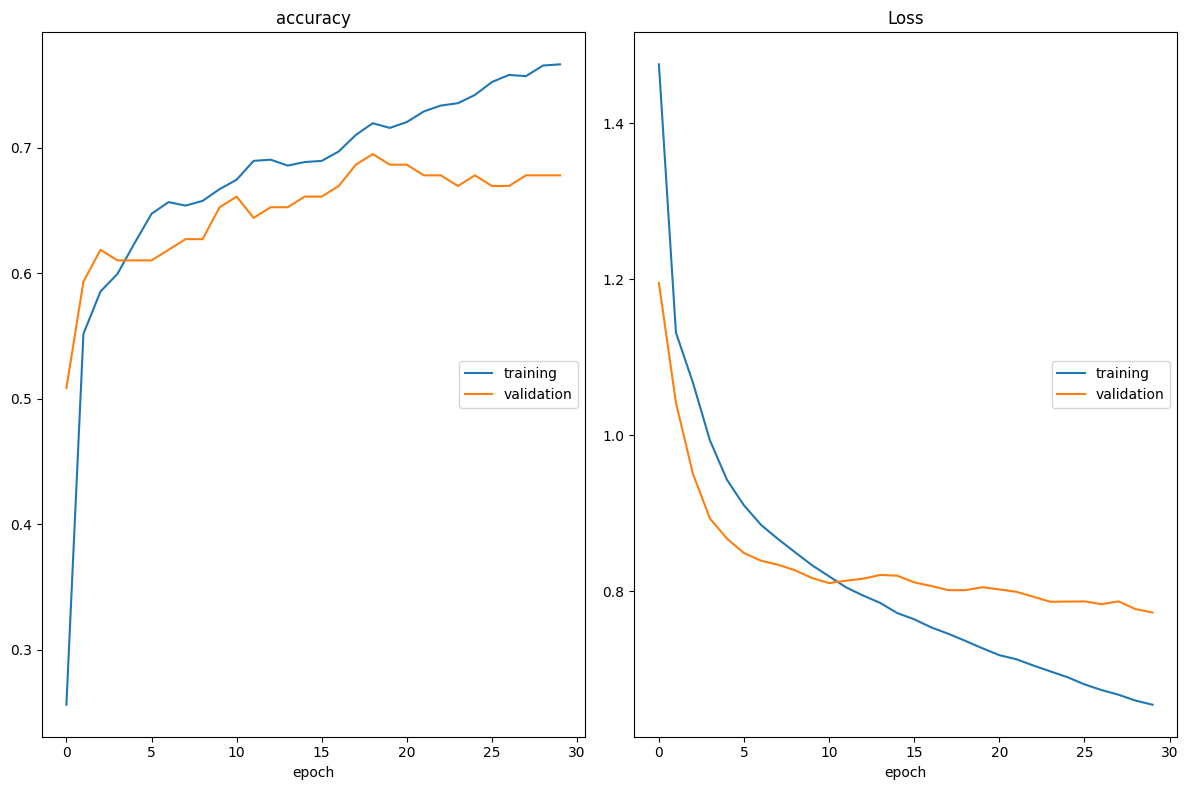

accuracy
	training         	 (min:    0.256, max:    0.766, cur:    0.766)
	validation       	 (min:    0.508, max:    0.695, cur:    0.678)
Loss
	training         	 (min:    0.655, max:    1.475, cur:    0.655)
	validation       	 (min:    0.773, max:    1.195, cur:    0.773)
5/5 [==============================] - 0s 123ms/step - loss: 0.6549 - accuracy: 0.7664 - val_loss: 0.7730 - val_accuracy: 0.6780
17.405468702316284
2/2 [==============================] - 0s 4ms/step
Accuracy:  0.6779661016949152
F1:  0.6189831566474111


In [322]:
#Softmax because there are multiple classes
start = time.time()
K.clear_session()

#Build model
model = Sequential()
model.add(Dense(100, input_dim=96, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))

#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train and evaluate model
plot_losses = livelossplot.PlotLossesKeras()
history = model.fit(X, y, epochs=30, batch_size=256, 
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, test_y))
#Elapsed time
end = time.time()
print(end - start)

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print("Accuracy: ", accuracy_score(y_pred_bool, act_y))
print("F1: ", f1_score(act_y,y_pred_bool, average='weighted'))